## Part A 
----------------------------------------------------------------------------------

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 1 : </b>
       Importing Libraries
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 2 : </b>
       Load Dataset
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [3]:
dataset = pd.read_csv('house_data.csv') 

In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 3 : </b>
       Define X and Y for simple linear regression 
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [5]:

X = dataset.iloc[: , 5:6].values


y = dataset.iloc[: , 2:3].values


In [6]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [7]:
y.shape

(21613, 1)

In [7]:
m = len(y)
m
print(X[5 , 0])

5420


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 4 : </b>
       Feature Scaling
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [8]:
def featureNormalization(X):
    X_norm = X
    mu = np.zeros((1 , len(X[0])))
    sigma = np.zeros((1 , len(X[0])))
    
    for i in range(len(X[0])):
        getSum = 0
        for j in range(len(X)):
            getSum = getSum + X[j , i]
            
        mean = 0
        mean = getSum / len(X)
        mu[0 , i] = mean
        
    #Calaculate the standard deviation
    for i in range(len(X[0])):
        sigma[0 , i] = np.std(X[: , i], dtype = np.float64)
        
    #Calaculate X_norm
    for i in range(len(X[0])):
        for j in range(len(X)):
            X_norm[j , i] = ( X[j , i] - mu[0 , i] ) / sigma[0 , i]
            
    return X_norm

X = featureNormalization(X)

X

array([[ 0],
       [ 0],
       [-1],
       ...,
       [-1],
       [ 0],
       [-1]], dtype=int64)

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 5 : </b>
       Plotting the data 
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

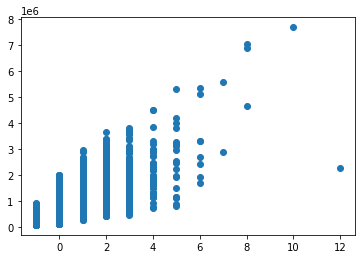

In [9]:
plt.scatter(X , y)

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 6 : </b>
       Adding ones column to X
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [10]:
X = np.concatenate((np.ones((m,1), dtype=int), X), axis=1) 
X.shape

(21613, 2)

In [11]:
theta = np.zeros((2 , 1))
theta

array([[0.],
       [0.]])

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7 : </b>
       Implement the model for one feature only
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [12]:
iterations = 1500
alpha = 0.01
print(X.shape)

(21613, 2)


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.1 : </b>
       Hypothesis Function
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [13]:
def hypothesis(X , theta):
    return X @ theta

In [14]:
print(y)

[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


In [15]:
print(hypothesis(X , theta))

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.2 : </b>
       Cost Function 
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [16]:
def computeCostFunction(X , y , theta):
    h = hypothesis(X , theta)
    
    
    return sum(np.power((h - y) , 2)) / (2 * m)

print(computeCostFunction(X , y , theta))

[2.13235672e+11]


In [17]:
J = computeCostFunction(X , y , theta)
print("With theta = [[0] , [0]] costFunction = " , J)


With theta = [[0] , [0]] costFunction =  [2.13235672e+11]


In [18]:
theta = np.ones((2 , 1))
J = computeCostFunction(X , y , theta)
print("With theta = [[-1] , [2]] costFunction = " , J)



With theta = [[-1] , [2]] costFunction =  [2.13234916e+11]


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.3 : </b>
       Gradient Descent to get the best parameters' theta  
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [19]:
theta = np.zeros((2 , 1))

#print(X[: , 1].reshape(21613 , 1))
def gradient_descent(X , y , alpha , num_iter , theta):
    
    J_History = np.zeros((num_iter , 1))
    
    for i in range(num_iter):        
        """ Calculate hypothesis function """
        h = hypothesis(X , theta)
        print("Error in iteration-" , i , " = " , h)
        
        """ Calculate the dervatie of Gradient Descent """
        theta_zero = theta[0] - alpha * sum(h - y) * (1/m)
        
        theta_one = theta[1] - alpha * (X[: , 1].T @ (h-y)) * (1/m)
        
       
        
        theta[0] = theta_zero
        theta[1] = theta_one
        
        J_History[i] = computeCostFunction(X , y , theta)
        
    return theta , J_History
    

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.4 : </b>
       Run Gradient Descent function with alpha = 0.01
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [20]:
new_theta , J_History = gradient_descent(X  , y , alpha , iterations , theta)

Error in iteration- 0  =  [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Error in iteration- 1  =  [[5400.88141767]
 [5400.88141767]
 [3250.29457641]
 ...
 [3250.29457641]
 [5400.88141767]
 [3250.29457641]]
Error in iteration- 2  =  [[10746.11518502]
 [10746.11518502]
 [ 6460.19272587]
 ...
 [ 6460.19272587]
 [10746.11518502]
 [ 6460.19272587]]
Error in iteration- 3  =  [[16036.26940064]
 [16036.26940064]
 [ 9630.14117179]
 ...
 [ 9630.14117179]
 [16036.26940064]
 [ 9630.14117179]]
Error in iteration- 4  =  [[21271.90638961]
 [21271.90638961]
 [12760.58192549]
 ...
 [12760.58192549]
 [21271.90638961]
 [12760.58192549]]
Error in iteration- 5  =  [[26453.58276207]
 [26453.58276207]
 [15851.95233483]
 ...
 [15851.95233483]
 [26453.58276207]
 [15851.95233483]]
Error in iteration- 6  =  [[31581.84947121]
 [31581.84947121]
 [18904.68513239]
 ...
 [18904.68513239]
 [31581.84947121]
 [18904.68513239]]
Error in iteration- 7  =  [[36657.25187056]
 [36657.25187056]
 [21919.20848311]
 ...
 [21919.20848

Error in iteration- 60  =  [[242473.74815486]
 [242473.74815486]
 [136747.72455584]
 ...
 [136747.72455584]
 [242473.74815486]
 [136747.72455584]]
Error in iteration- 61  =  [[245369.32448774]
 [245369.32448774]
 [138224.92808222]
 ...
 [138224.92808222]
 [245369.32448774]
 [138224.92808222]]
Error in iteration- 62  =  [[248234.86419855]
 [248234.86419855]
 [139681.64573113]
 ...
 [139681.64573113]
 [248234.86419855]
 [139681.64573113]]
Error in iteration- 63  =  [[251070.67493156]
 [251070.67493156]
 [141118.11280486]
 ...
 [141118.11280486]
 [251070.67493156]
 [141118.11280486]]
Error in iteration- 64  =  [[253877.06119949]
 [253877.06119949]
 [142534.56208319]
 ...
 [142534.56208319]
 [253877.06119949]
 [142534.56208319]]
Error in iteration- 65  =  [[256654.32441527]
 [256654.32441527]
 [143931.22384956]
 ...
 [143931.22384956]
 [256654.32441527]
 [143931.22384956]]
Error in iteration- 66  =  [[259402.76292347]
 [259402.76292347]
 [145308.32591708]
 ...
 [145308.32591708]
 [259402.7

Error in iteration- 119  =  [[370641.67600698]
 [370641.67600698]
 [195472.87820359]
 ...
 [195472.87820359]
 [370641.67600698]
 [195472.87820359]]
Error in iteration- 120  =  [[372202.65479497]
 [372202.65479497]
 [196072.72134017]
 ...
 [196072.72134017]
 [372202.65479497]
 [196072.72134017]]
Error in iteration- 121  =  [[373747.29136995]
 [373747.29136995]
 [196662.38846054]
 ...
 [196662.38846054]
 [373747.29136995]
 [196662.38846054]]
Error in iteration- 122  =  [[375275.75385296]
 [375275.75385296]
 [197242.00330432]
 ...
 [197242.00330432]
 [375275.75385296]
 [197242.00330432]]
Error in iteration- 123  =  [[376788.20865   ]
 [376788.20865   ]
 [197811.68825403]
 ...
 [197811.68825403]
 [376788.20865   ]
 [197811.68825403]]
Error in iteration- 124  =  [[378284.82046943]
 [378284.82046943]
 [198371.56434932]
 ...
 [198371.56434932]
 [378284.82046943]
 [198371.56434932]]
Error in iteration- 125  =  [[379765.75233931]
 [379765.75233931]
 [198921.75130112]
 ...
 [198921.75130112]
 [3

Error in iteration- 180  =  [[441205.38523041]
 [441205.38523041]
 [217263.67481339]
 ...
 [217263.67481339]
 [441205.38523041]
 [217263.67481339]]
Error in iteration- 181  =  [[442023.55994931]
 [442023.55994931]
 [217427.02771706]
 ...
 [217427.02771706]
 [442023.55994931]
 [217427.02771706]]
Error in iteration- 182  =  [[442833.05391971]
 [442833.05391971]
 [217585.71395853]
 ...
 [217585.71395853]
 [442833.05391971]
 [217585.71395853]]
Error in iteration- 183  =  [[443633.957008  ]
 [443633.957008  ]
 [217739.79600453]
 ...
 [217739.79600453]
 [443633.957008  ]
 [217739.79600453]]
Error in iteration- 184  =  [[444426.35816102]
 [444426.35816102]
 [217889.33561264]
 ...
 [217889.33561264]
 [444426.35816102]
 [217889.33561264]]
Error in iteration- 185  =  [[445210.34541542]
 [445210.34541542]
 [218034.39383878]
 ...
 [218034.39383878]
 [445210.34541542]
 [218034.39383878]]
Error in iteration- 186  =  [[445986.00590692]
 [445986.00590692]
 [218175.03104476]
 ...
 [218175.03104476]
 [4

Error in iteration- 238  =  [[476732.32268514]
 [476732.32268514]
 [220682.45316377]
 ...
 [220682.45316377]
 [476732.32268514]
 [220682.45316377]]
Error in iteration- 239  =  [[477170.76028413]
 [477170.76028413]
 [220659.3948507 ]
 ...
 [220659.3948507 ]
 [477170.76028413]
 [220659.3948507 ]]
Error in iteration- 240  =  [[477604.46182816]
 [477604.46182816]
 [220634.32417096]
 ...
 [220634.32417096]
 [477604.46182816]
 [220634.32417096]]
Error in iteration- 241  =  [[478033.47675334]
 [478033.47675334]
 [220607.27284858]
 ...
 [220607.27284858]
 [478033.47675334]
 [220607.27284858]]
Error in iteration- 242  =  [[478457.85398792]
 [478457.85398792]
 [220578.27222914]
 ...
 [220578.27222914]
 [478457.85398792]
 [220578.27222914]]
Error in iteration- 243  =  [[478877.64195747]
 [478877.64195747]
 [220547.35328387]
 ...
 [220547.35328387]
 [478877.64195747]
 [220547.35328387]]
Error in iteration- 244  =  [[479292.88859002]
 [479292.88859002]
 [220514.5466137 ]
 ...
 [220514.5466137 ]
 [4

Error in iteration- 297  =  [[495896.45045227]
 [495896.45045227]
 [216756.74163088]
 ...
 [216756.74163088]
 [495896.45045227]
 [216756.74163088]]
Error in iteration- 298  =  [[496125.65136096]
 [496125.65136096]
 [216658.60741502]
 ...
 [216658.60741502]
 [496125.65136096]
 [216658.60741502]]
Error in iteration- 299  =  [[496352.31081765]
 [496352.31081765]
 [216559.801317  ]
 ...
 [216559.801317  ]
 [496352.31081765]
 [216559.801317  ]]
Error in iteration- 300  =  [[496576.45566157]
 [496576.45566157]
 [216460.33855889]
 ...
 [216460.33855889]
 [496576.45566157]
 [216460.33855889]]
Error in iteration- 301  =  [[496798.11245466]
 [496798.11245466]
 [216360.23416611]
 ...
 [216360.23416611]
 [496798.11245466]
 [216360.23416611]]
Error in iteration- 302  =  [[497017.30748449]
 [497017.30748449]
 [216259.50296966]
 ...
 [216259.50296966]
 [497017.30748449]
 [216259.50296966]]
Error in iteration- 303  =  [[497234.06676701]
 [497234.06676701]
 [216158.15960828]
 ...
 [216158.15960828]
 [4

Error in iteration- 354  =  [[505591.43827852]
 [505591.43827852]
 [210466.93489121]
 ...
 [210466.93489121]
 [505591.43827852]
 [210466.93489121]]
Error in iteration- 355  =  [[505711.50823429]
 [505711.50823429]
 [210349.82540695]
 ...
 [210349.82540695]
 [505711.50823429]
 [210349.82540695]]
Error in iteration- 356  =  [[505830.19674996]
 [505830.19674996]
 [210232.6540728 ]
 ...
 [210232.6540728 ]
 [505830.19674996]
 [210232.6540728 ]]
Error in iteration- 357  =  [[505947.51864551]
 [505947.51864551]
 [210115.42782332]
 ...
 [210115.42782332]
 [505947.51864551]
 [210115.42782332]]
Error in iteration- 358  =  [[506063.48858672]
 [506063.48858672]
 [209998.15349099]
 ...
 [209998.15349099]
 [506063.48858672]
 [209998.15349099]]
Error in iteration- 359  =  [[506178.12108673]
 [506178.12108673]
 [209880.83780738]
 ...
 [209880.83780738]
 [506178.12108673]
 [209880.83780738]]
Error in iteration- 360  =  [[506291.43050763]
 [506291.43050763]
 [209763.48740439]
 ...
 [209763.48740439]
 [5

Error in iteration- 413  =  [[510730.76548537]
 [510730.76548537]
 [203636.06538829]
 ...
 [203636.06538829]
 [510730.76548537]
 [203636.06538829]]
Error in iteration- 414  =  [[510790.32038404]
 [510790.32038404]
 [203524.33773458]
 ...
 [203524.33773458]
 [510790.32038404]
 [203524.33773458]]
Error in iteration- 415  =  [[510849.14920934]
 [510849.14920934]
 [203412.8162751 ]
 ...
 [203412.8162751 ]
 [510849.14920934]
 [203412.8162751 ]]
Error in iteration- 416  =  [[510907.25993242]
 [510907.25993242]
 [203301.50360051]
 ...
 [203301.50360051]
 [510907.25993242]
 [203301.50360051]]
Error in iteration- 417  =  [[510964.66044064]
 [510964.66044064]
 [203190.40225161]
 ...
 [203190.40225161]
 [510964.66044064]
 [203190.40225161]]
Error in iteration- 418  =  [[511021.35853838]
 [511021.35853838]
 [203079.51471994]
 ...
 [203079.51471994]
 [511021.35853838]
 [203079.51471994]]
Error in iteration- 419  =  [[511077.36194797]
 [511077.36194797]
 [202968.8434484 ]
 ...
 [202968.8434484 ]
 [5

Error in iteration- 470  =  [[513170.0309661 ]
 [513170.0309661 ]
 [197655.15729534]
 ...
 [197655.15729534]
 [513170.0309661 ]
 [197655.15729534]]
Error in iteration- 471  =  [[513198.77668941]
 [513198.77668941]
 [197558.07812264]
 ...
 [197558.07812264]
 [513198.77668941]
 [197558.07812264]]
Error in iteration- 472  =  [[513227.13907171]
 [513227.13907171]
 [197461.28902337]
 ...
 [197461.28902337]
 [513227.13907171]
 [197461.28902337]]
Error in iteration- 473  =  [[513255.12245959]
 [513255.12245959]
 [197364.7905651 ]
 ...
 [197364.7905651 ]
 [513255.12245959]
 [197364.7905651 ]]
Error in iteration- 474  =  [[513282.73115327]
 [513282.73115327]
 [197268.58329197]
 ...
 [197268.58329197]
 [513282.73115327]
 [197268.58329197]]
Error in iteration- 475  =  [[513309.96940712]
 [513309.96940712]
 [197172.66772494]
 ...
 [197172.66772494]
 [513309.96940712]
 [197172.66772494]]
Error in iteration- 476  =  [[513336.84143013]
 [513336.84143013]
 [197077.04436218]
 ...
 [197077.04436218]
 [5

Error in iteration- 526  =  [[514294.59916778]
 [514294.59916778]
 [192673.68738866]
 ...
 [192673.68738866]
 [514294.59916778]
 [192673.68738866]]
Error in iteration- 527  =  [[514307.44615547]
 [514307.44615547]
 [192593.1829159 ]
 ...
 [192593.1829159 ]
 [514307.44615547]
 [192593.1829159 ]]
Error in iteration- 528  =  [[514320.0935356 ]
 [514320.0935356 ]
 [192512.97199026]
 ...
 [192512.97199026]
 [514320.0935356 ]
 [192512.97199026]]
Error in iteration- 529  =  [[514332.54368007]
 [514332.54368007]
 [192433.05427801]
 ...
 [192433.05427801]
 [514332.54368007]
 [192433.05427801]]
Error in iteration- 530  =  [[514344.79893496]
 [514344.79893496]
 [192353.42943543]
 ...
 [192353.42943543]
 [514344.79893496]
 [192353.42943543]]
Error in iteration- 531  =  [[514356.86162087]
 [514356.86162087]
 [192274.09710904]
 ...
 [192274.09710904]
 [514356.86162087]
 [192274.09710904]]
Error in iteration- 532  =  [[514368.73403314]
 [514368.73403314]
 [192195.0569357 ]
 ...
 [192195.0569357 ]
 [5

Error in iteration- 582  =  [[514763.86126416]
 [514763.86126416]
 [188605.17017046]
 ...
 [188605.17017046]
 [514763.86126416]
 [188605.17017046]]
Error in iteration- 583  =  [[514768.55765535]
 [514768.55765535]
 [188540.36887577]
 ...
 [188540.36887577]
 [514768.55765535]
 [188540.36887577]]
Error in iteration- 584  =  [[514773.15412251]
 [514773.15412251]
 [188475.83108813]
 ...
 [188475.83108813]
 [514773.15412251]
 [188475.83108813]]
Error in iteration- 585  =  [[514777.65194184]
 [514777.65194184]
 [188411.55612576]
 ...
 [188411.55612576]
 [514777.65194184]
 [188411.55612576]]
Error in iteration- 586  =  [[514782.05237526]
 [514782.05237526]
 [188347.54330375]
 ...
 [188347.54330375]
 [514782.05237526]
 [188347.54330375]]
Error in iteration- 587  =  [[514786.35667063]
 [514786.35667063]
 [188283.79193414]
 ...
 [188283.79193414]
 [514786.35667063]
 [188283.79193414]]
Error in iteration- 588  =  [[514790.56606181]
 [514790.56606181]
 [188220.30132597]
 ...
 [188220.30132597]
 [5

Error in iteration- 642  =  [[514906.2519981 ]
 [514906.2519981 ]
 [185159.03802662]
 ...
 [185159.03802662]
 [514906.2519981 ]
 [185159.03802662]]
Error in iteration- 643  =  [[514906.78987908]
 [514906.78987908]
 [185108.76774981]
 ...
 [185108.76774981]
 [514906.78987908]
 [185108.76774981]]
Error in iteration- 644  =  [[514907.28366333]
 [514907.28366333]
 [185058.71686584]
 ...
 [185058.71686584]
 [514907.28366333]
 [185058.71686584]]
Error in iteration- 645  =  [[514907.7339926 ]
 [514907.7339926 ]
 [185008.88461854]
 ...
 [185008.88461854]
 [514907.7339926 ]
 [185008.88461854]]
Error in iteration- 646  =  [[514908.14150119]
 [514908.14150119]
 [184959.27025197]
 ...
 [184959.27025197]
 [514908.14150119]
 [184959.27025197]]
Error in iteration- 647  =  [[514908.50681594]
 [514908.50681594]
 [184909.87301049]
 ...
 [184909.87301049]
 [514908.50681594]
 [184909.87301049]]
Error in iteration- 648  =  [[514908.83055643]
 [514908.83055643]
 [184860.69213877]
 ...
 [184860.69213877]
 [5

Error in iteration- 699  =  [[514882.66441634]
 [514882.66441634]
 [182621.88270546]
 ...
 [182621.88270546]
 [514882.66441634]
 [182621.88270546]]
Error in iteration- 700  =  [[514881.52273055]
 [514881.52273055]
 [182582.92989508]
 ...
 [182582.92989508]
 [514881.52273055]
 [182582.92989508]]
Error in iteration- 701  =  [[514880.36364797]
 [514880.36364797]
 [182544.1546002 ]
 ...
 [182544.1546002 ]
 [514880.36364797]
 [182544.1546002 ]]
Error in iteration- 702  =  [[514879.18749111]
 [514879.18749111]
 [182505.55612084]
 ...
 [182505.55612084]
 [514879.18749111]
 [182505.55612084]]
Error in iteration- 703  =  [[514877.99457846]
 [514877.99457846]
 [182467.13375853]
 ...
 [182467.13375853]
 [514877.99457846]
 [182467.13375853]]
Error in iteration- 704  =  [[514876.78522455]
 [514876.78522455]
 [182428.88681637]
 ...
 [182428.88681637]
 [514876.78522455]
 [182428.88681637]]
Error in iteration- 705  =  [[514875.55974001]
 [514875.55974001]
 [182390.81459901]
 ...
 [182390.81459901]
 [5

Error in iteration- 758  =  [[514794.40288476]
 [514794.40288476]
 [180605.39054631]
 ...
 [180605.39054631]
 [514794.40288476]
 [180605.39054631]]
Error in iteration- 759  =  [[514792.67442278]
 [514792.67442278]
 [180575.76789039]
 ...
 [180575.76789039]
 [514792.67442278]
 [180575.76789039]]
Error in iteration- 760  =  [[514790.9419889 ]
 [514790.9419889 ]
 [180546.28437881]
 ...
 [180546.28437881]
 [514790.9419889 ]
 [180546.28437881]]
Error in iteration- 761  =  [[514789.20573188]
 [514789.20573188]
 [180516.93941628]
 ...
 [180516.93941628]
 [514789.20573188]
 [180516.93941628]]
Error in iteration- 762  =  [[514787.46579846]
 [514787.46579846]
 [180487.73240942]
 ...
 [180487.73240942]
 [514787.46579846]
 [180487.73240942]]
Error in iteration- 763  =  [[514785.72233332]
 [514785.72233332]
 [180458.66276676]
 ...
 [180458.66276676]
 [514785.72233332]
 [180458.66276676]]
Error in iteration- 764  =  [[514783.97547916]
 [514783.97547916]
 [180429.72989876]
 ...
 [180429.72989876]
 [5

Error in iteration- 815  =  [[514693.17318522]
 [514693.17318522]
 [179122.31255998]
 ...
 [179122.31255998]
 [514693.17318522]
 [179122.31255998]]
Error in iteration- 816  =  [[514691.40399469]
 [514691.40399469]
 [179099.72710956]
 ...
 [179099.72710956]
 [514691.40399469]
 [179099.72710956]]
Error in iteration- 817  =  [[514689.63663321]
 [514689.63663321]
 [179077.24992454]
 ...
 [179077.24992454]
 [514689.63663321]
 [179077.24992454]]
Error in iteration- 818  =  [[514687.8711636 ]
 [514687.8711636 ]
 [179054.88051804]
 ...
 [179054.88051804]
 [514687.8711636 ]
 [179054.88051804]]
Error in iteration- 819  =  [[514686.10764764]
 [514686.10764764]
 [179032.61840499]
 ...
 [179032.61840499]
 [514686.10764764]
 [179032.61840499]]
Error in iteration- 820  =  [[514684.34614606]
 [514684.34614606]
 [179010.46310219]
 ...
 [179010.46310219]
 [514684.34614606]
 [179010.46310219]]
Error in iteration- 821  =  [[514682.58671857]
 [514682.58671857]
 [178988.41412824]
 ...
 [178988.41412824]
 [5

Error in iteration- 872  =  [[514596.72135081]
 [514596.72135081]
 [177994.20179227]
 ...
 [177994.20179227]
 [514596.72135081]
 [177994.20179227]]
Error in iteration- 873  =  [[514595.13051184]
 [514595.13051184]
 [177977.06302217]
 ...
 [177977.06302217]
 [514595.13051184]
 [177977.06302217]]
Error in iteration- 874  =  [[514593.54373309]
 [514593.54373309]
 [177960.00760567]
 ...
 [177960.00760567]
 [514593.54373309]
 [177960.00760567]]
Error in iteration- 875  =  [[514591.96103439]
 [514591.96103439]
 [177943.03515512]
 ...
 [177943.03515512]
 [514591.96103439]
 [177943.03515512]]
Error in iteration- 876  =  [[514590.38243504]
 [514590.38243504]
 [177926.14528448]
 ...
 [177926.14528448]
 [514590.38243504]
 [177926.14528448]]
Error in iteration- 877  =  [[514588.80795387]
 [514588.80795387]
 [177909.33760931]
 ...
 [177909.33760931]
 [514588.80795387]
 [177909.33760931]]
Error in iteration- 878  =  [[514587.23760919]
 [514587.23760919]
 [177892.6117468 ]
 ...
 [177892.6117468 ]
 [5

Error in iteration- 929  =  [[514512.92822992]
 [514512.92822992]
 [177139.59991565]
 ...
 [177139.59991565]
 [514512.92822992]
 [177139.59991565]]
Error in iteration- 930  =  [[514511.587934  ]
 [514511.587934  ]
 [177126.63900712]
 ...
 [177126.63900712]
 [514511.587934  ]
 [177126.63900712]]
Error in iteration- 931  =  [[514510.25218566]
 [514510.25218566]
 [177113.74179519]
 ...
 [177113.74179519]
 [514510.25218566]
 [177113.74179519]]
Error in iteration- 932  =  [[514508.92098448]
 [514508.92098448]
 [177100.90797667]
 ...
 [177100.90797667]
 [514508.92098448]
 [177100.90797667]]
Error in iteration- 933  =  [[514507.59432985]
 [514507.59432985]
 [177088.13724969]
 ...
 [177088.13724969]
 [514507.59432985]
 [177088.13724969]]
Error in iteration- 934  =  [[514506.2722209 ]
 [514506.2722209 ]
 [177075.42931372]
 ...
 [177075.42931372]
 [514506.2722209 ]
 [177075.42931372]]
Error in iteration- 935  =  [[514504.95465658]
 [514504.95465658]
 [177062.78386956]
 ...
 [177062.78386956]
 [5

Error in iteration- 989  =  [[514440.45238635]
 [514440.45238635]
 [176464.94051898]
 ...
 [176464.94051898]
 [514440.45238635]
 [176464.94051898]]
Error in iteration- 990  =  [[514439.37796009]
 [514439.37796009]
 [176455.30829805]
 ...
 [176455.30829805]
 [514439.37796009]
 [176455.30829805]]
Error in iteration- 991  =  [[514438.30775671]
 [514438.30775671]
 [176445.72379267]
 ...
 [176445.72379267]
 [514438.30775671]
 [176445.72379267]]
Error in iteration- 992  =  [[514437.2417671 ]
 [514437.2417671 ]
 [176436.18677174]
 ...
 [176436.18677174]
 [514437.2417671 ]
 [176436.18677174]]
Error in iteration- 993  =  [[514436.17998211]
 [514436.17998211]
 [176426.69700529]
 ...
 [176426.69700529]
 [514436.17998211]
 [176426.69700529]]
Error in iteration- 994  =  [[514435.12239251]
 [514435.12239251]
 [176417.25426435]
 ...
 [176417.25426435]
 [514435.12239251]
 [176417.25426435]]
Error in iteration- 995  =  [[514434.06898896]
 [514434.06898896]
 [176407.85832104]
 ...
 [176407.85832104]
 [5

Error in iteration- 1048  =  [[514383.96297121]
 [514383.96297121]
 [175971.23218209]
 ...
 [175971.23218209]
 [514383.96297121]
 [175971.23218209]]
Error in iteration- 1049  =  [[514383.1202602 ]
 [514383.1202602 ]
 [175964.05250595]
 ...
 [175964.05250595]
 [514383.1202602 ]
 [175964.05250595]]
Error in iteration- 1050  =  [[514382.28114727]
 [514382.28114727]
 [175956.9085979 ]
 ...
 [175956.9085979 ]
 [514382.28114727]
 [175956.9085979 ]]
Error in iteration- 1051  =  [[514381.44562095]
 [514381.44562095]
 [175949.80028264]
 ...
 [175949.80028264]
 [514381.44562095]
 [175949.80028264]]
Error in iteration- 1052  =  [[514380.61366978]
 [514380.61366978]
 [175942.7273857 ]
 ...
 [175942.7273857 ]
 [514380.61366978]
 [175942.7273857 ]]
Error in iteration- 1053  =  [[514379.78528225]
 [514379.78528225]
 [175935.68973344]
 ...
 [175935.68973344]
 [514379.78528225]
 [175935.68973344]]
Error in iteration- 1054  =  [[514378.96044689]
 [514378.96044689]
 [175928.68715303]
 ...
 [175928.687153

Error in iteration- 1105  =  [[514341.33420988]
 [514341.33420988]
 [175614.26024206]
 ...
 [175614.26024206]
 [514341.33420988]
 [175614.26024206]]
Error in iteration- 1106  =  [[514340.67824397]
 [514340.67824397]
 [175608.86246439]
 ...
 [175608.86246439]
 [514340.67824397]
 [175608.86246439]]
Error in iteration- 1107  =  [[514340.02522427]
 [514340.02522427]
 [175603.49168568]
 ...
 [175603.49168568]
 [514340.02522427]
 [175603.49168568]]
Error in iteration- 1108  =  [[514339.37513964]
 [514339.37513964]
 [175598.14777251]
 ...
 [175598.14777251]
 [514339.37513964]
 [175598.14777251]]
Error in iteration- 1109  =  [[514338.72797897]
 [514338.72797897]
 [175592.83059209]
 ...
 [175592.83059209]
 [514338.72797897]
 [175592.83059209]]
Error in iteration- 1110  =  [[514338.08373115]
 [514338.08373115]
 [175587.54001227]
 ...
 [175587.54001227]
 [514338.08373115]
 [175587.54001227]]
Error in iteration- 1111  =  [[514337.44238512]
 [514337.44238512]
 [175582.27590154]
 ...
 [175582.275901

Error in iteration- 1165  =  [[514306.82027414]
 [514306.82027414]
 [175333.91384026]
 ...
 [175333.91384026]
 [514306.82027414]
 [175333.91384026]]
Error in iteration- 1166  =  [[514306.32211308]
 [514306.32211308]
 [175329.92046285]
 ...
 [175329.92046285]
 [514306.32211308]
 [175329.92046285]]
Error in iteration- 1167  =  [[514305.82627014]
 [514305.82627014]
 [175325.94712183]
 ...
 [175325.94712183]
 [514305.82627014]
 [175325.94712183]]
Error in iteration- 1168  =  [[514305.33273563]
 [514305.33273563]
 [175321.99371752]
 ...
 [175321.99371752]
 [514305.33273563]
 [175321.99371752]]
Error in iteration- 1169  =  [[514304.84149991]
 [514304.84149991]
 [175318.06015078]
 ...
 [175318.06015078]
 [514304.84149991]
 [175318.06015078]]
Error in iteration- 1170  =  [[514304.35255334]
 [514304.35255334]
 [175314.1463229 ]
 ...
 [175314.1463229 ]
 [514304.35255334]
 [175314.1463229 ]]
Error in iteration- 1171  =  [[514303.86588633]
 [514303.86588633]
 [175310.25213569]
 ...
 [175310.252135

Error in iteration- 1279  =  [[514262.82623596]
 [514262.82623596]
 [174986.69666026]
 ...
 [174986.69666026]
 [514262.82623596]
 [174986.69666026]]
Error in iteration- 1280  =  [[514262.53694671]
 [514262.53694671]
 [174984.44868915]
 ...
 [174984.44868915]
 [514262.53694671]
 [174984.44868915]]
Error in iteration- 1281  =  [[514262.24905776]
 [514262.24905776]
 [174982.21203975]
 ...
 [174982.21203975]
 [514262.24905776]
 [174982.21203975]]
Error in iteration- 1282  =  [[514261.96256266]
 [514261.96256266]
 [174979.98665531]
 ...
 [174979.98665531]
 [514261.96256266]
 [174979.98665531]]
Error in iteration- 1283  =  [[514261.677455  ]
 [514261.677455  ]
 [174977.77247937]
 ...
 [174977.77247937]
 [514261.677455  ]
 [174977.77247937]]
Error in iteration- 1284  =  [[514261.39372839]
 [514261.39372839]
 [174975.56945573]
 ...
 [174975.56945573]
 [514261.39372839]
 [174975.56945573]]
Error in iteration- 1285  =  [[514261.11137646]
 [514261.11137646]
 [174973.3775285 ]
 ...
 [174973.377528

Error in iteration- 1340  =  [[514247.52347676]
 [514247.52347676]
 [174868.38598603]
 ...
 [174868.38598603]
 [514247.52347676]
 [174868.38598603]]
Error in iteration- 1341  =  [[514247.30871881]
 [514247.30871881]
 [174866.7342498 ]
 ...
 [174866.7342498 ]
 [514247.30871881]
 [174866.7342498 ]]
Error in iteration- 1342  =  [[514247.0950134 ]
 [514247.0950134 ]
 [174865.09084298]
 ...
 [174865.09084298]
 [514247.0950134 ]
 [174865.09084298]]
Error in iteration- 1343  =  [[514246.88235556]
 [514246.88235556]
 [174863.45572373]
 ...
 [174863.45572373]
 [514246.88235556]
 [174863.45572373]]
Error in iteration- 1344  =  [[514246.67074032]
 [514246.67074032]
 [174861.8288504 ]
 ...
 [174861.8288504 ]
 [514246.67074032]
 [174861.8288504 ]]
Error in iteration- 1345  =  [[514246.46016275]
 [514246.46016275]
 [174860.21018154]
 ...
 [174860.21018154]
 [514246.46016275]
 [174860.21018154]]
Error in iteration- 1346  =  [[514246.25061794]
 [514246.25061794]
 [174858.59967592]
 ...
 [174858.599675

Error in iteration- 1398  =  [[514236.66256882]
 [514236.66256882]
 [174785.14637207]
 ...
 [174785.14637207]
 [514236.66256882]
 [174785.14637207]]
Error in iteration- 1399  =  [[514236.50126439]
 [514236.50126439]
 [174783.91458274]
 ...
 [174783.91458274]
 [514236.50126439]
 [174783.91458274]]
Error in iteration- 1400  =  [[514236.34075724]
 [514236.34075724]
 [174782.68901065]
 ...
 [174782.68901065]
 [514236.34075724]
 [174782.68901065]]
Error in iteration- 1401  =  [[514236.18104355]
 [514236.18104355]
 [174781.4696245 ]
 ...
 [174781.4696245 ]
 [514236.18104355]
 [174781.4696245 ]]
Error in iteration- 1402  =  [[514236.02211947]
 [514236.02211947]
 [174780.25639314]
 ...
 [174780.25639314]
 [514236.02211947]
 [174780.25639314]]
Error in iteration- 1403  =  [[514235.86398121]
 [514235.86398121]
 [174779.0492856 ]
 ...
 [174779.0492856 ]
 [514235.86398121]
 [174779.0492856 ]]
Error in iteration- 1404  =  [[514235.70662498]
 [514235.70662498]
 [174777.84827102]
 ...
 [174777.848271

Error in iteration- 1456  =  [[514228.51338002]
 [514228.51338002]
 [174723.07700833]
 ...
 [174723.07700833]
 [514228.51338002]
 [174723.07700833]]
Error in iteration- 1457  =  [[514228.39247807]
 [514228.39247807]
 [174722.15860487]
 ...
 [174722.15860487]
 [514228.39247807]
 [174722.15860487]]
Error in iteration- 1458  =  [[514228.27217741]
 [514228.27217741]
 [174721.24483994]
 ...
 [174721.24483994]
 [514228.27217741]
 [174721.24483994]]
Error in iteration- 1459  =  [[514228.1524751 ]
 [514228.1524751 ]
 [174720.33569018]
 ...
 [174720.33569018]
 [514228.1524751 ]
 [174720.33569018]]
Error in iteration- 1460  =  [[514228.03336822]
 [514228.03336822]
 [174719.43113231]
 ...
 [174719.43113231]
 [514228.03336822]
 [174719.43113231]]
Error in iteration- 1461  =  [[514227.91485387]
 [514227.91485387]
 [174718.53114319]
 ...
 [174718.53114319]
 [514227.91485387]
 [174718.53114319]]
Error in iteration- 1462  =  [[514227.79692915]
 [514227.79692915]
 [174717.63569978]
 ...
 [174717.635699

In [21]:
new_theta

array([[514223.72543425],
       [339536.96447305]])

In [22]:
J_History

array([[2.09872884e+11],
       [2.06576102e+11],
       [2.03344013e+11],
       ...,
       [3.78540828e+10],
       [3.78540827e+10],
       [3.78540827e+10]])

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.5 : </b>
       Prediction function
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [23]:
""" Predict X with new theta """
def prediction_simple_LR(theta , X):
    return theta[0] + theta[1] * X



<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.6 : </b>
       Prediction function for the one feature and alpha = 0.01
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

[514223.72543425 514223.72543425 174686.7609612  ... 174686.7609612
 514223.72543425 174686.7609612 ]


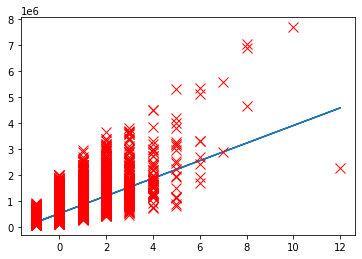

In [24]:
pred = prediction_simple_LR(new_theta, X[:, 1])
plt.plot(X[:, 1], pred)
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
print(pred)

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.7 : </b>
      Plot the history of the cost function with alpha = 0.01
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

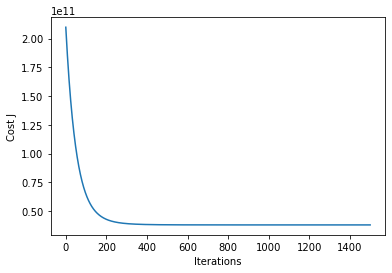

In [25]:
""" with alpha = 0.01 """
plt.plot(J_History)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.8 : </b>
       Run Gradient Descent function for the one feature and alpha = 0.1
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [26]:
new_theta , J_History = gradient_descent(X  , y , 0.1 , iterations , theta)

Error in iteration- 0  =  [[514223.72543425]
 [514223.72543425]
 [174686.7609612 ]
 ...
 [174686.7609612 ]
 [514223.72543425]
 [174686.7609612 ]]
Error in iteration- 1  =  [[514222.75495215]
 [514222.75495215]
 [174679.41147205]
 ...
 [174679.41147205]
 [514222.75495215]
 [174679.41147205]]
Error in iteration- 2  =  [[514221.83290758]
 [514221.83290758]
 [174672.43332372]
 ...
 [174672.43332372]
 [514221.83290758]
 [174672.43332372]]
Error in iteration- 3  =  [[514220.95691745]
 [514220.95691745]
 [174665.80778259]
 ...
 [174665.80778259]
 [514220.95691745]
 [174665.80778259]]
Error in iteration- 4  =  [[514220.12471238]
 [514220.12471238]
 [174659.51705723]
 ...
 [174659.51705723]
 [514220.12471238]
 [174659.51705723]]
Error in iteration- 5  =  [[514219.33413163]
 [514219.33413163]
 [174653.5442513 ]
 ...
 [174653.5442513 ]
 [514219.33413163]
 [174653.5442513 ]]
Error in iteration- 6  =  [[514218.58311826]
 [514218.58311826]
 [174647.87331874]
 ...
 [174647.87331874]
 [514218.58311826

Error in iteration- 60  =  [[514205.27786994]
 [514205.27786994]
 [174547.86334783]
 ...
 [174547.86334783]
 [514205.27786994]
 [174547.86334783]]
Error in iteration- 61  =  [[514205.23426506]
 [514205.23426506]
 [174547.53694358]
 ...
 [174547.53694358]
 [514205.23426506]
 [174547.53694358]]
Error in iteration- 62  =  [[514205.19286563]
 [514205.19286563]
 [174547.22705555]
 ...
 [174547.22705555]
 [514205.19286563]
 [174547.22705555]]
Error in iteration- 63  =  [[514205.15356015]
 [514205.15356015]
 [174546.93284806]
 ...
 [174546.93284806]
 [514205.15356015]
 [174546.93284806]]
Error in iteration- 64  =  [[514205.11624276]
 [514205.11624276]
 [174546.65352772]
 ...
 [174546.65352772]
 [514205.11624276]
 [174546.65352772]]
Error in iteration- 65  =  [[514205.08081294]
 [514205.08081294]
 [174546.38834125]
 ...
 [174546.38834125]
 [514205.08081294]
 [174546.38834125]]
Error in iteration- 66  =  [[514205.04717526]
 [514205.04717526]
 [174546.13657351]
 ...
 [174546.13657351]
 [514205.0

Error in iteration- 120  =  [[514204.45418602]
 [514204.45418602]
 [174541.69898426]
 ...
 [174541.69898426]
 [514204.45418602]
 [174541.69898426]]
Error in iteration- 121  =  [[514204.45225135]
 [514204.45225135]
 [174541.68450857]
 ...
 [174541.68450857]
 [514204.45225135]
 [174541.68450857]]
Error in iteration- 122  =  [[514204.45041458]
 [514204.45041458]
 [174541.67076539]
 ...
 [174541.67076539]
 [514204.45041458]
 [174541.67076539]]
Error in iteration- 123  =  [[514204.44867076]
 [514204.44867076]
 [174541.65771766]
 ...
 [174541.65771766]
 [514204.44867076]
 [174541.65771766]]
Error in iteration- 124  =  [[514204.44701518]
 [514204.44701518]
 [174541.64533019]
 ...
 [174541.64533019]
 [514204.44701518]
 [174541.64533019]]
Error in iteration- 125  =  [[514204.44544337]
 [514204.44544337]
 [174541.63356956]
 ...
 [174541.63356956]
 [514204.44544337]
 [174541.63356956]]
Error in iteration- 126  =  [[514204.44395111]
 [514204.44395111]
 [174541.62240407]
 ...
 [174541.62240407]
 [5

Error in iteration- 178  =  [[514204.41783474]
 [514204.41783474]
 [174541.42699655]
 ...
 [174541.42699655]
 [514204.41783474]
 [174541.42699655]]
Error in iteration- 179  =  [[514204.41773956]
 [514204.41773956]
 [174541.42628435]
 ...
 [174541.42628435]
 [514204.41773956]
 [174541.42628435]]
Error in iteration- 180  =  [[514204.41764919]
 [514204.41764919]
 [174541.42560818]
 ...
 [174541.42560818]
 [514204.41764919]
 [174541.42560818]]
Error in iteration- 181  =  [[514204.41756339]
 [514204.41756339]
 [174541.42496624]
 ...
 [174541.42496624]
 [514204.41756339]
 [174541.42496624]]
Error in iteration- 182  =  [[514204.41748193]
 [514204.41748193]
 [174541.42435677]
 ...
 [174541.42435677]
 [514204.41748193]
 [174541.42435677]]
Error in iteration- 183  =  [[514204.4174046 ]
 [514204.4174046 ]
 [174541.42377815]
 ...
 [174541.42377815]
 [514204.4174046 ]
 [174541.42377815]]
Error in iteration- 184  =  [[514204.41733118]
 [514204.41733118]
 [174541.42322881]
 ...
 [174541.42322881]
 [5

Error in iteration- 235  =  [[514204.41605118]
 [514204.41605118]
 [174541.41365167]
 ...
 [174541.41365167]
 [514204.41605118]
 [174541.41365167]]
Error in iteration- 236  =  [[514204.41604625]
 [514204.41604625]
 [174541.41361476]
 ...
 [174541.41361476]
 [514204.41604625]
 [174541.41361476]]
Error in iteration- 237  =  [[514204.41604156]
 [514204.41604156]
 [174541.41357972]
 ...
 [174541.41357972]
 [514204.41604156]
 [174541.41357972]]
Error in iteration- 238  =  [[514204.41603712]
 [514204.41603712]
 [174541.41354646]
 ...
 [174541.41354646]
 [514204.41603712]
 [174541.41354646]]
Error in iteration- 239  =  [[514204.4160329 ]
 [514204.4160329 ]
 [174541.41351487]
 ...
 [174541.41351487]
 [514204.4160329 ]
 [174541.41351487]]
Error in iteration- 240  =  [[514204.41602889]
 [514204.41602889]
 [174541.41348489]
 ...
 [174541.41348489]
 [514204.41602889]
 [174541.41348489]]
Error in iteration- 241  =  [[514204.41602508]
 [514204.41602508]
 [174541.41345642]
 ...
 [174541.41345642]
 [5

Error in iteration- 292  =  [[514204.41595875]
 [514204.41595875]
 [174541.41296011]
 ...
 [174541.41296011]
 [514204.41595875]
 [174541.41296011]]
Error in iteration- 293  =  [[514204.4159585]
 [514204.4159585]
 [174541.4129582]
 ...
 [174541.4129582]
 [514204.4159585]
 [174541.4129582]]
Error in iteration- 294  =  [[514204.41595825]
 [514204.41595825]
 [174541.41295638]
 ...
 [174541.41295638]
 [514204.41595825]
 [174541.41295638]]
Error in iteration- 295  =  [[514204.41595802]
 [514204.41595802]
 [174541.41295466]
 ...
 [174541.41295466]
 [514204.41595802]
 [174541.41295466]]
Error in iteration- 296  =  [[514204.4159578 ]
 [514204.4159578 ]
 [174541.41295302]
 ...
 [174541.41295302]
 [514204.4159578 ]
 [174541.41295302]]
Error in iteration- 297  =  [[514204.4159576 ]
 [514204.4159576 ]
 [174541.41295147]
 ...
 [174541.41295147]
 [514204.4159576 ]
 [174541.41295147]]
Error in iteration- 298  =  [[514204.4159574 ]
 [514204.4159574 ]
 [174541.41294999]
 ...
 [174541.41294999]
 [514204.

Error in iteration- 348  =  [[514204.41595398]
 [514204.41595398]
 [174541.41292438]
 ...
 [174541.41292438]
 [514204.41595398]
 [174541.41292438]]
Error in iteration- 349  =  [[514204.41595396]
 [514204.41595396]
 [174541.41292427]
 ...
 [174541.41292427]
 [514204.41595396]
 [174541.41292427]]
Error in iteration- 350  =  [[514204.41595395]
 [514204.41595395]
 [174541.41292417]
 ...
 [174541.41292417]
 [514204.41595395]
 [174541.41292417]]
Error in iteration- 351  =  [[514204.41595394]
 [514204.41595394]
 [174541.41292408]
 ...
 [174541.41292408]
 [514204.41595394]
 [174541.41292408]]
Error in iteration- 352  =  [[514204.41595392]
 [514204.41595392]
 [174541.41292399]
 ...
 [174541.41292399]
 [514204.41595392]
 [174541.41292399]]
Error in iteration- 353  =  [[514204.41595391]
 [514204.41595391]
 [174541.4129239 ]
 ...
 [174541.4129239 ]
 [514204.41595391]
 [174541.4129239 ]]
Error in iteration- 354  =  [[514204.4159539 ]
 [514204.4159539 ]
 [174541.41292382]
 ...
 [174541.41292382]
 [5

Error in iteration- 406  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292241]
 ...
 [174541.41292241]
 [514204.41595371]
 [174541.41292241]]
Error in iteration- 407  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292241]
 ...
 [174541.41292241]
 [514204.41595371]
 [174541.41292241]]
Error in iteration- 408  =  [[514204.41595371]
 [514204.41595371]
 [174541.4129224 ]
 ...
 [174541.4129224 ]
 [514204.41595371]
 [174541.4129224 ]]
Error in iteration- 409  =  [[514204.41595371]
 [514204.41595371]
 [174541.4129224 ]
 ...
 [174541.4129224 ]
 [514204.41595371]
 [174541.4129224 ]]
Error in iteration- 410  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292239]
 ...
 [174541.41292239]
 [514204.41595371]
 [174541.41292239]]
Error in iteration- 411  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292239]
 ...
 [174541.41292239]
 [514204.41595371]
 [174541.41292239]]
Error in iteration- 412  =  [[514204.41595371]
 [514204.41595371]
 [174541.41292239]
 ...
 [174541.41292239]
 [5

Error in iteration- 466  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 467  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 468  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 469  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 470  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 471  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [514204.4159537 ]
 [174541.41292232]]
Error in iteration- 472  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292232]
 ...
 [174541.41292232]
 [5

Error in iteration- 524  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 525  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 526  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 527  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 528  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 529  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 530  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 581  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 582  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 583  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 584  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 585  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 586  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 587  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 638  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 639  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 640  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 641  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 642  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 643  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 644  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 697  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 698  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 699  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 700  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 701  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 702  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 703  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 755  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 756  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 757  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 758  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 759  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 760  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 761  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 813  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 814  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 815  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 816  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 817  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 818  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 819  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 869  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 870  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 871  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 872  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 873  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 874  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 875  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 927  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 928  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 929  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 930  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 931  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 932  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 933  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 983  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 984  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 985  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 986  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 987  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 988  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 989  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [5

Error in iteration- 1044  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1045  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1046  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1047  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1048  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1049  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1050  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1099  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1100  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1101  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1102  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1103  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1104  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1105  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1155  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1156  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1157  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1158  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1159  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1160  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1161  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1214  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1215  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1216  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1217  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1218  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1219  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1220  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1270  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1271  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1272  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1273  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1274  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1275  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1276  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1383  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1384  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1385  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1386  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1387  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1388  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1389  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1438  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1439  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1440  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1441  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1442  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1443  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1444  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.412922

Error in iteration- 1498  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]
Error in iteration- 1499  =  [[514204.4159537 ]
 [514204.4159537 ]
 [174541.41292231]
 ...
 [174541.41292231]
 [514204.4159537 ]
 [174541.41292231]]


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.9 : </b>
       Plot the history of the cost function alpha = 0.1
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [ ]:
""" with alpha = 0.1 """
plt.plot(J_History)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [ ]:
new_theta

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 7.10 : </b>
       Prediction function for the one feature and alpha = 0.1
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

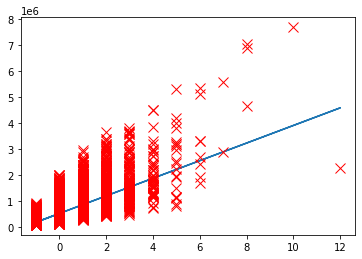

In [29]:
pred = prediction_simple_LR(new_theta, X[:, 1])

plt.plot(X[:, 1], pred)
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')

In [30]:
pred

array([514204.4159537 , 514204.4159537 , 174541.41292231, ...,
       174541.41292231, 514204.4159537 , 174541.41292231])

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8 : </b>
       Applying the Linear Regression algorithm for the multiple features
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [31]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8.1 : </b>
       Defining the new X (features)
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [32]:
X =  dataset[["grade" , "bathrooms" , "lat" , "sqft_living" , "view"]].values
X.shape
print(len(X[0]))

5


In [33]:
""" Feature Scaling """
X_norm = featureNormalization(X)
X_norm

X_norm = np.concatenate((np.ones((m,1), dtype=int), X_norm), axis=1) 
X_norm

array([[ 1.        , -0.55883575, -1.44746357, -0.35257175, -0.97983502,
        -0.30575946],
       [ 1.        , -0.55883575,  0.1756067 ,  1.16156823,  0.53363434,
        -0.30575946],
       [ 1.        , -1.40958711, -1.44746357,  1.28353661, -1.42625404,
        -0.30575946],
       ...,
       [ 1.        , -0.55883575, -1.77207762,  0.24788796, -1.15404732,
        -0.30575946],
       [ 1.        ,  0.29191561,  0.50022075, -0.18441416, -0.52252773,
        -0.30575946],
       [ 1.        , -0.55883575, -1.77207762,  0.24572284, -1.15404732,
        -0.30575946]])

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8.2 : </b>
       Gradient Descent for multiple features
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [34]:
""" Linear Regression Multiple Features """

def gradient_descent_multi(X , y , theta , alpha , num_iters):
    
    J_History = np.zeros((num_iters , 1))
    
    for i in range(num_iters):
        error = (X @ theta) - y
        print("Error in iteration-" , i , " = " , error)
        theta = theta - alpha * (1/m) * (X.T @ error)
        
        J_History[i] = computeCostFunction(X , y , theta)
        
    return theta , J_History
        


<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8.3 : </b>
      Run gradient descent function with alpha = 0.01
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [35]:
length = len(X_norm[0])
theta = np.zeros((length , 1))
new_theta , J_History = gradient_descent_multi(X_norm , y , theta , alpha , iterations)

Error in iteration- 0  =  [[-221900.]
 [-538000.]
 [-180000.]
 ...
 [-402101.]
 [-400000.]
 [-325000.]]
Error in iteration- 1  =  [[-224027.6183771 ]
 [-531391.33182801]
 [-183518.74657096]
 ...
 [-404626.67393927]
 [-394920.00112393]
 [-327528.11417402]]
Error in iteration- 2  =  [[-226012.81185539]
 [-524855.12857152]
 [-186840.06978844]
 ...
 [-406989.57381209]
 [-389895.14775021]
 [-329893.41967557]]
Error in iteration- 3  =  [[-227860.09936801]
 [-518390.49818765]
 [-189970.11760802]
 ...
 [-409194.83608062]
 [-384924.81290777]
 [-332101.05357347]]
Error in iteration- 4  =  [[-229573.87505361]
 [-511996.56183554]
 [-192914.86906364]
 ...
 [-411247.45560942]
 [-380008.3777317 ]
 [-334156.01132615]]
Error in iteration- 5  =  [[-231158.411554  ]
 [-505672.45363441]
 [-195680.13872333]
 ...
 [-413152.28940454]
 [-375145.23133539]
 [-336063.15052105]]
Error in iteration- 6  =  [[-232617.86322593]
 [-499417.32042667]
 [-198271.5810291 ]
 ...
 [-414914.06025548]
 [-370334.77068514]
 [-33

Error in iteration- 56  =  [[-211395.98863156]
 [-258852.90858578]
 [-195254.01455915]
 ...
 [-394870.32297943]
 [-185622.70496084]
 [-317865.74867333]]
Error in iteration- 57  =  [[-209991.81631622]
 [-255222.20822857]
 [-193778.35655461]
 ...
 [-393336.35129579]
 [-182850.99597645]
 [-316332.94634237]]
Error in iteration- 58  =  [[-208572.9131995 ]
 [-251629.17586741]
 [-192279.72521579]
 ...
 [-391784.95729853]
 [-180108.99658099]
 [-314782.70756719]]
Error in iteration- 59  =  [[-207140.1468987 ]
 [-248073.39533446]
 [-190759.31946416]
 ...
 [-390217.13242864]
 [-177396.38936985]
 [-313216.02399048]]
Error in iteration- 60  =  [[-205694.35787725]
 [-244554.45562265]
 [-189218.30129699]
 ...
 [-388633.83726465]
 [-174712.86055025]
 [-311633.85638884]]
Error in iteration- 61  =  [[-204236.36019185]
 [-241071.95080853]
 [-187657.7967985 ]
 ...
 [-387036.00237025]
 [-172058.09989429]
 [-310037.13552057]]
Error in iteration- 62  =  [[-202766.94221983]
 [-237625.47997649]
 [-186078.89712

Error in iteration- 113  =  [[-125037.2967617 ]
 [-101604.15876287]
 [ -98395.22600877]
 ...
 [-299316.39391062]
 [ -67018.0728868 ]
 [-222360.67287374]]
Error in iteration- 114  =  [[-123611.81095933]
 [ -99581.8721999 ]
 [ -96752.08369151]
 ...
 [-297727.55664294]
 [ -65523.01382218]
 [-220772.44068081]]
Error in iteration- 115  =  [[-122193.52574136]
 [ -97579.9672717 ]
 [ -95116.79199541]
 ...
 [-296146.50024506]
 [ -64044.20507719]
 [-219191.98268488]]
Error in iteration- 116  =  [[-120782.53380191]
 [ -95598.23085243]
 [ -93489.49198565]
 ...
 [-294573.3341444 ]
 [ -62581.47731647]
 [-217619.40839377]]
Error in iteration- 117  =  [[-119378.92272453]
 [ -93636.45217733]
 [ -91870.31767567]
 ...
 [-293008.1619288 ]
 [ -61134.66300533]
 [-216054.82147459]]
Error in iteration- 118  =  [[-117982.77514075]
 [ -91694.42281319]
 [ -90259.39624283]
 ...
 [-291451.08152678]
 [ -59703.5963893 ]
 [-214498.319934  ]]
Error in iteration- 119  =  [[-116594.16888443]
 [ -89771.93662946]
 [ -8865

Error in iteration- 172  =  [[ -54572.6298578 ]
 [ -11178.51225293]
 [ -17117.96741592]
 ...
 [-220505.56601446]
 [  -1836.54793978]
 [-143576.30275739]]
Error in iteration- 173  =  [[ -53619.13852542]
 [ -10059.34940204]
 [ -16024.59277222]
 ...
 [-219435.39245063]
 [  -1060.89812676]
 [-142506.44822334]]
Error in iteration- 174  =  [[ -52673.21043787]
 [  -8951.24434581]
 [ -14940.28017975]
 ...
 [-218373.60178307]
 [   -294.02553744]
 [-141444.97319487]]
Error in iteration- 175  =  [[ -51734.80683775]
 [  -7854.08431294]
 [ -13864.9864058 ]
 ...
 [-217320.15237165]
 [    464.16091653]
 [-140391.83606881]]
Error in iteration- 176  =  [[ -50803.88845203]
 [  -6767.75771182]
 [ -12798.66743677]
 ...
 [-216275.00196664]
 [   1213.75138341]
 [-139346.99463196]]
Error in iteration- 177  =  [[ -49880.41552032]
 [  -5692.15411749]
 [ -11741.27851718]
 ...
 [-215238.10774102]
 [   1954.83508136]
 [-138310.40609337]]
Error in iteration- 178  =  [[ -48964.34782219]
 [  -4627.16425874]
 [ -1069

Error in iteration- 230  =  [[ -10457.64495525]
 [  38487.47513102]
 [  32844.77355022]
 ...
 [-170863.55971355]
 [  31095.67306893]
 [ -93948.17288122]]
Error in iteration- 231  =  [[  -9871.62485893]
 [  39120.17877468]
 [  33495.93485714]
 ...
 [-170202.00572962]
 [  31487.5706206 ]
 [ -93286.79093912]]
Error in iteration- 232  =  [[  -9290.65630867]
 [  39746.75892292]
 [  34141.01514921]
 ...
 [-169546.08613725]
 [  31874.68563828]
 [ -92631.04156555]]
Error in iteration- 233  =  [[  -8714.69814818]
 [  40367.27735834]
 [  34780.06465442]
 ...
 [-168895.75548458]
 [  32257.06820442]
 [ -91980.87932769]]
Error in iteration- 234  =  [[  -8143.70942949]
 [  40981.79523242]
 [  35413.13336729]
 ...
 [-168250.96854232]
 [  32634.76788961]
 [ -91336.2590151 ]]
Error in iteration- 235  =  [[  -7577.64941589]
 [  41590.37307217]
 [  36040.27104439]
 ...
 [-167611.68030729]
 [  33007.83375787]
 [ -90697.13564326]]
Error in iteration- 236  =  [[  -7016.47758482]
 [  42193.07078663]
 [  3666

Error in iteration- 292  =  [[  17751.78287742]
 [  68158.76168646]
 [  63468.42563118]
 ...
 [-138921.11914903]
 [  47989.06107183]
 [ -62013.57092083]]
Error in iteration- 293  =  [[  18093.66499435]
 [  68508.03066804]
 [  63827.27889758]
 ...
 [-138532.44820172]
 [  48162.40059776]
 [ -61624.9883841 ]]
Error in iteration- 294  =  [[  18432.60372975]
 [  68854.02729606]
 [  64182.64141018]
 ...
 [-138147.0755459 ]
 [  48333.26644405]
 [ -61239.7031836 ]]
Error in iteration- 295  =  [[  18768.62563187]
 [  69196.78437522]
 [  64534.54590423]
 ...
 [-137764.97167477]
 [  48501.68511169]
 [ -60857.68582241]]
Error in iteration- 296  =  [[  19101.75702738]
 [  69536.33437832]
 [  64883.02484193]
 ...
 [-137386.10732584]
 [  48667.68283082]
 [ -60478.90704777]]
Error in iteration- 297  =  [[  19432.02402253]
 [  69872.7094496 ]
 [  65228.1104137 ]
 ...
 [-137010.45347962]
 [  48831.28556352]
 [ -60103.33784988]]
Error in iteration- 298  =  [[  19759.45250436]
 [  70205.94140811]
 [  6556

Error in iteration- 346  =  [[  32593.8676069 ]
 [  83055.12366056]
 [  78581.51012766]
 ...
 [-121993.79315473]
 [  54389.26145899]
 [ -45089.86777245]]
Error in iteration- 347  =  [[  32809.70503663]
 [  83267.36422889]
 [  78792.40637736]
 ...
 [-121746.62899121]
 [  54461.0155391 ]
 [ -44842.75233569]]
Error in iteration- 348  =  [[  33023.74755051]
 [  83477.70283274]
 [  79001.22644514]
 ...
 [-121501.48474769]
 [  54531.39962032]
 [ -44597.65627417]]
Error in iteration- 349  =  [[  33236.01159242]
 [  83686.15843081]
 [  79207.99052969]
 ...
 [-121258.34208924]
 [  54600.42890093]
 [ -44354.56125861]]
Error in iteration- 350  =  [[  33446.51345523]
 [  83892.74979048]
 [  79412.71864146]
 ...
 [-121017.18284833]
 [  54668.11842304]
 [ -44113.44912709]]
Error in iteration- 351  =  [[  33655.26928205]
 [  84097.49548972]
 [  79615.43060413]
 ...
 [-120777.98902344]
 [  54734.48307415]
 [ -43874.30188362]]
Error in iteration- 352  =  [[  33862.29506749]
 [  84300.41391905]
 [  7981

Error in iteration- 407  =  [[  42995.32832834]
 [  93114.18247107]
 [  88284.21674139]
 ...
 [-110032.93230433]
 [  56733.23566217]
 [ -33131.15907565]]
Error in iteration- 408  =  [[  43126.94533149]
 [  93239.11474877]
 [  88399.41197496]
 ...
 [-109880.78051155]
 [  56744.35052112]
 [ -32979.03133345]]
Error in iteration- 409  =  [[  43257.53555705]
 [  93363.01187061]
 [  88513.46996835]
 ...
 [-109729.7908973 ]
 [  56754.78613372]
 [ -32828.06548309]]
Error in iteration- 410  =  [[  43387.10827476]
 [  93485.88405064]
 [  88626.40196596]
 ...
 [-109579.95309092]
 [  56764.55056598]
 [ -32678.25115693]]
Error in iteration- 411  =  [[  43515.6726667 ]
 [  93607.74139991]
 [  88738.21910282]
 ...
 [-109431.25681921]
 [  56773.65179999]
 [ -32529.57808479]]
Error in iteration- 412  =  [[  43643.23782811]
 [  93728.59392748]
 [  88848.93240556]
 ...
 [-109283.69190557]
 [  56782.09773481]
 [ -32382.03609304]]
Error in iteration- 413  =  [[  43769.81276819]
 [  93848.45154143]
 [  8895

Error in iteration- 467  =  [[  49353.54174124]
 [  99082.36603503]
 [  93519.61946607]
 ...
 [-102648.95981483]
 [  56437.21304972]
 [ -25748.21246947]]
Error in iteration- 468  =  [[  49437.32196861]
 [  99160.19651001]
 [  93583.19305289]
 ...
 [-102551.11709137]
 [  56419.35074366]
 [ -25650.38104366]]
Error in iteration- 469  =  [[  49520.50122411]
 [  99237.45328209]
 [  93646.14148987]
 ...
 [-102453.95938681]
 [  56401.17000049]
 [ -25553.23448671]]
Error in iteration- 470  =  [[  49603.08474626]
 [  99314.14191014]
 [  93708.47099814]
 ...
 [-102357.48081797]
 [  56382.67510196]
 [ -25456.76691707]]
Error in iteration- 471  =  [[  49685.0777241 ]
 [  99390.26789694]
 [  93770.18773731]
 ...
 [-102261.6755568 ]
 [  56363.87028432]
 [ -25360.97250833]]
Error in iteration- 472  =  [[  49766.48529763]
 [  99465.83668974]
 [  93831.29780612]
 ...
 [-102166.53782992]
 [  56344.75973881]
 [ -25265.8454887 ]]
Error in iteration- 473  =  [[  49847.31255834]
 [  99540.85368083]
 [  9389

Error in iteration- 528  =  [[ 53529.66543149]
 [102954.0150057 ]
 [ 96448.66404069]
 ...
 [-97748.30373838]
 [ 54897.75675016]
 [-20848.02212229]]
Error in iteration- 529  =  [[ 53584.81560855]
 [103005.26799516]
 [ 96483.55668533]
 ...
 [-97683.21778264]
 [ 54866.88507331]
 [-20782.9407859 ]]
Error in iteration- 530  =  [[ 53639.60881149]
 [103056.2014302 ]
 [ 96518.11002457]
 ...
 [-97618.54225321]
 [ 54835.88741267]
 [-20718.26980032]]
Error in iteration- 531  =  [[ 53694.0479887 ]
 [103106.81830538]
 [ 96552.3274451 ]
 ...
 [-97554.27382273]
 [ 54804.76597732]
 [-20654.00583906]]
Error in iteration- 532  =  [[ 53748.13606117]
 [103157.12158505]
 [ 96586.2122999 ]
 ...
 [-97490.40919441]
 [ 54773.52295201]
 [-20590.1456062 ]]
Error in iteration- 533  =  [[ 53801.87592281]
 [103207.11420365]
 [ 96619.7679086 ]
 ...
 [-97426.94510179]
 [ 54742.16049745]
 [-20526.68583612]]
Error in iteration- 534  =  [[ 53855.27044063]
 [103256.79906601]
 [ 96652.99755781]
 ...
 [-97363.87830844]
 [ 

Error in iteration- 591  =  [[ 56409.42779504]
 [105661.73904958]
 [ 98100.79047704]
 ...
 [-94333.65846446]
 [ 52781.63421853]
 [-17433.55017505]]
Error in iteration- 592  =  [[ 56446.90061266]
 [105697.67104081]
 [ 98119.76044788]
 ...
 [-94288.9893116 ]
 [ 52746.30698346]
 [-17388.88227399]]
Error in iteration- 593  =  [[ 56484.15786813]
 [105733.42362661]
 [ 98138.55015275]
 ...
 [-94244.57056272]
 [ 52710.95402499]
 [-17344.46474169]]
Error in iteration- 594  =  [[ 56521.20121292]
 [105768.99838896]
 [ 98157.16139329]
 ...
 [-94200.40034212]
 [ 52675.57642113]
 [-17300.29570292]]
Error in iteration- 595  =  [[ 56558.03228365]
 [105804.39689387]
 [ 98175.59595314]
 ...
 [-94156.4767908 ]
 [ 52640.17523726]
 [-17256.3732991 ]]
Error in iteration- 596  =  [[ 56594.65270221]
 [105839.62069164]
 [ 98193.85559814]
 ...
 [-94112.79806624]
 [ 52604.75152621]
 [-17212.69568815]]
Error in iteration- 597  =  [[ 56631.0640759 ]
 [105874.67131695]
 [ 98211.94207649]
 ...
 [-94069.36234231]
 [ 

Error in iteration- 651  =  [[ 58326.22983631]
 [107547.28883738]
 [ 98973.69099154]
 ...
 [-92039.87301381]
 [ 50647.84654932]
 [-15139.79070116]]
Error in iteration- 652  =  [[ 58353.24586975]
 [107574.78239365]
 [ 98984.49657158]
 ...
 [-92007.40894631]
 [ 50612.50853228]
 [-15107.32642087]]
Error in iteration- 653  =  [[ 58380.12338545]
 [107602.16809597]
 [ 98995.20348207]
 ...
 [-91975.10749288]
 [ 50577.1909959 ]
 [-15075.02473923]]
Error in iteration- 654  =  [[ 58406.86335366]
 [107629.44680827]
 [ 99005.81270874]
 ...
 [-91942.96754318]
 [ 50541.89445202]
 [-15042.88454612]]
Error in iteration- 655  =  [[ 58433.4667363 ]
 [107656.61938582]
 [ 99016.32522744]
 ...
 [-91910.98799627]
 [ 50506.6194058 ]
 [-15010.90474082]]
Error in iteration- 656  =  [[ 58459.93448698]
 [107683.68667536]
 [ 99026.74200427]
 ...
 [-91879.16776055]
 [ 50471.36635572]
 [-14979.08423197]]
Error in iteration- 657  =  [[ 58486.26755111]
 [107710.64951519]
 [ 99037.06399561]
 ...
 [-91847.50575365]
 [ 

Error in iteration- 716  =  [[ 59831.46760541]
 [109142.58448415]
 [ 99507.93155762]
 ...
 [-90225.15901525]
 [ 48411.8142955 ]
 [-13325.03933068]]
Error in iteration- 717  =  [[ 59851.18052458]
 [109164.54031556]
 [ 99514.00196213]
 ...
 [-90201.31341909]
 [ 48378.62129061]
 [-13301.19290302]]
Error in iteration- 718  =  [[ 59870.80358421]
 [109186.42979852]
 [ 99520.02094242]
 ...
 [-90177.57451591]
 [ 48345.47072691]
 [-13277.45316357]]
Error in iteration- 719  =  [[ 59890.33734624]
 [109208.25338524]
 [ 99525.9890103 ]
 ...
 [-90153.94165626]
 [ 48312.36280009]
 [-13253.81946301]]
Error in iteration- 720  =  [[ 59909.78236809]
 [109230.0115235 ]
 [ 99531.9066724 ]
 ...
 [-90130.41419588]
 [ 48279.29770251]
 [-13230.29115714]]
Error in iteration- 721  =  [[ 59929.13920267]
 [109251.70465669]
 [ 99537.77443027]
 ...
 [-90106.99149555]
 [ 48246.27562324]
 [-13206.86760689]]
Error in iteration- 722  =  [[ 59948.40839843]
 [109273.33322384]
 [ 99543.59278044]
 ...
 [-90083.67292115]
 [ 

Error in iteration- 777  =  [[ 60887.59517609]
 [110374.68035844]
 [ 99800.13381187]
 ...
 [-88944.88144786]
 [ 46470.2129032 ]
 [-12044.70561406]]
Error in iteration- 778  =  [[ 60902.71120306]
 [110393.27810284]
 [ 99803.84279196]
 ...
 [-88926.51878068]
 [ 46439.86420206]
 [-12026.3419825 ]]
Error in iteration- 779  =  [[ 60917.76465423]
 [110411.83038832]
 [ 99807.52376246]
 ...
 [-88908.23112834]
 [ 46409.56493009]
 [-12008.05336567]]
Error in iteration- 780  =  [[ 60932.75587836]
 [110430.33746526]
 [ 99811.17699936]
 ...
 [-88890.01808353]
 [ 46379.31513516]
 [-11989.8393563 ]]
Error in iteration- 781  =  [[ 60947.68522163]
 [110448.79958169]
 [ 99814.80277584]
 ...
 [-88871.87924193]
 [ 46349.11486347]
 [-11971.69955014]]
Error in iteration- 782  =  [[ 60962.55302761]
 [110467.21698328]
 [ 99818.40136236]
 ...
 [-88853.81420217]
 [ 46318.96415958]
 [-11953.63354585]]
Error in iteration- 783  =  [[ 60977.35963732]
 [110485.58991339]
 [ 99821.97302661]
 ...
 [-88835.82256578]
 [ 

Error in iteration- 839  =  [[ 61718.33234356]
 [111450.07143817]
 [ 99986.17264607]
 ...
 [-87934.34785746]
 [ 44683.05930087]
 [-11034.11356155]]
Error in iteration- 840  =  [[ 61730.14127306]
 [111466.246882  ]
 [ 99988.57546992]
 ...
 [-87919.96519046]
 [ 44655.8123689 ]
 [-11019.729995  ]]
Error in iteration- 841  =  [[ 61741.90508931]
 [111482.38871546]
 [ 99990.96304327]
 ...
 [-87905.63704161]
 [ 44628.61531777]
 [-11005.40094851]]
Error in iteration- 842  =  [[ 61753.62401606]
 [111498.49708018]
 [ 99993.33551302]
 ...
 [-87891.36314667]
 [ 44601.46812216]
 [-10991.12615786]]
Error in iteration- 843  =  [[ 61765.29827558]
 [111514.57211655]
 [ 99995.69302456]
 ...
 [-87877.14324311]
 [ 44574.37075599]
 [-10976.90536056]]
Error in iteration- 844  =  [[ 61776.9280886 ]
 [111530.61396373]
 [ 99998.0357218 ]
 ...
 [-87862.97707019]
 [ 44547.32319243]
 [-10962.73829586]]
Error in iteration- 845  =  [[ 61788.51367438]
 [111546.62275964]
 [100000.36374721]
 ...
 [-87848.86436883]
 [ 

Error in iteration- 904  =  [[ 62400.92143471]
 [112437.0059988 ]
 [100116.15435294]
 ...
 [-87102.40092201]
 [ 43014.20530897]
 [-10202.11276844]]
Error in iteration- 905  =  [[ 62410.20498376]
 [112451.24473249]
 [100117.81533414]
 ...
 [-87091.0796562 ]
 [ 42990.12013013]
 [-10190.79075454]]
Error in iteration- 906  =  [[ 62419.45529817]
 [112465.45695611]
 [100119.46807668]
 ...
 [-87079.79880719]
 [ 42966.08194976]
 [-10179.50916001]]
Error in iteration- 907  =  [[ 62428.67252526]
 [112479.64275222]
 [100121.1126561 ]
 ...
 [-87068.558199  ]
 [ 42942.09070911]
 [-10168.2678089 ]]
Error in iteration- 908  =  [[ 62437.85681149]
 [112493.8022027 ]
 [100122.74914717]
 ...
 [-87057.35765668]
 [ 42918.14634911]
 [-10157.06652625]]
Error in iteration- 909  =  [[ 62447.00830244]
 [112507.93538882]
 [100124.37762391]
 ...
 [-87046.19700633]
 [ 42894.2488104 ]
 [-10145.90513817]]
Error in iteration- 910  =  [[ 62456.12714281]
 [112522.04239124]
 [100125.99815956]
 ...
 [-87035.07607505]
 [ 

Error in iteration- 967  =  [[ 62926.24486318]
 [113285.21411845]
 [100207.2965497 ]
 ...
 [-86461.6705854 ]
 [ 41586.14593662]
 [ -9561.3404076 ]]
Error in iteration- 968  =  [[ 62933.69086977]
 [113297.92222541]
 [100208.55955601]
 ...
 [-86452.58861506]
 [ 41564.8975725 ]
 [ -9552.25785363]]
Error in iteration- 969  =  [[ 62941.11143318]
 [113310.60800915]
 [100209.81784518]
 ...
 [-86443.53771346]
 [ 41543.69208643]
 [ -9543.20637096]]
Error in iteration- 970  =  [[ 62948.50665626]
 [113323.27152277]
 [100211.07145673]
 ...
 [-86434.51775658]
 [ 41522.52940856]
 [ -9534.18583558]]
Error in iteration- 971  =  [[ 62955.87664129]
 [113335.91281902]
 [100212.32042977]
 ...
 [-86425.52862107]
 [ 41501.40946897]
 [ -9525.19612413]]
Error in iteration- 972  =  [[ 62963.22149002]
 [113348.53195035]
 [100213.56480301]
 ...
 [-86416.57018422]
 [ 41480.33219768]
 [ -9516.23711389]]
Error in iteration- 973  =  [[ 62970.54130365]
 [113361.12896887]
 [100214.80461476]
 ...
 [-86407.64232393]
 [ 

Error in iteration- 1031  =  [[ 63355.45865504]
 [114055.55521544]
 [100280.03675363]
 ...
 [-85938.27151505]
 [ 40309.7528307 ]
 [ -9037.90899094]]
Error in iteration- 1032  =  [[ 63361.46296869]
 [114066.92983286]
 [100281.06298225]
 ...
 [-85930.9522814 ]
 [ 40291.10615196]
 [ -9030.58932932]]
Error in iteration- 1033  =  [[ 63367.44745679]
 [114078.2849808 ]
 [100282.08635458]
 ...
 [-85923.65731692]
 [ 40272.49781885]
 [ -9023.29393914]]
Error in iteration- 1034  =  [[ 63373.41219371]
 [114089.62069679]
 [100283.10689104]
 ...
 [-85916.38653127]
 [ 40253.92776074]
 [ -9016.02273005]]
Error in iteration- 1035  =  [[ 63379.35725345]
 [114100.93701816]
 [100284.12461184]
 ...
 [-85909.1398345 ]
 [ 40235.395907  ]
 [ -9008.7756121 ]]
Error in iteration- 1036  =  [[ 63385.28270965]
 [114112.23398209]
 [100285.13953699]
 ...
 [-85901.91713709]
 [ 40216.90218709]
 [ -9001.55249576]]
Error in iteration- 1037  =  [[ 63391.18863561]
 [114123.51162558]
 [100286.15168629]
 ...
 [-85894.718349

Error in iteration- 1094  =  [[ 63697.7678304 ]
 [114735.53023076]
 [100339.81097453]
 ...
 [-85521.20274239]
 [ 39207.1242403 ]
 [ -8620.81744941]]
Error in iteration- 1095  =  [[ 63702.65553185]
 [114745.74559562]
 [100340.68997868]
 ...
 [-85515.2512721 ]
 [ 39190.75737643]
 [ -8614.86568235]]
Error in iteration- 1096  =  [[ 63707.52748147]
 [114755.94357593]
 [100341.56707864]
 ...
 [-85509.31910669]
 [ 39174.42451477]
 [ -8608.93322205]]
Error in iteration- 1097  =  [[ 63712.38373515]
 [114766.12420103]
 [100342.44228512]
 ...
 [-85503.40617789]
 [ 39158.12558862]
 [ -8603.02000024]]
Error in iteration- 1098  =  [[ 63717.2243485 ]
 [114776.28750019]
 [100343.31560873]
 ...
 [-85497.5124177 ]
 [ 39141.86053139]
 [ -8597.12594891]]
Error in iteration- 1099  =  [[ 63722.04937693]
 [114786.43350259]
 [100344.18705995]
 ...
 [-85491.63775842]
 [ 39125.62927655]
 [ -8591.25100037]]
Error in iteration- 1100  =  [[ 63726.85887557]
 [114796.5622373 ]
 [100345.05664918]
 ...
 [-85485.782132

Error in iteration- 1158  =  [[ 63981.00999828]
 [115355.43546094]
 [100392.61364915]
 ...
 [-85176.55453322]
 [ 38225.47052146]
 [ -8276.15379598]]
Error in iteration- 1159  =  [[ 63984.99301412]
 [115364.59395016]
 [100393.38850613]
 ...
 [-85171.71201253]
 [ 38211.14904618]
 [ -8271.31108703]]
Error in iteration- 1160  =  [[ 63988.9634212 ]
 [115373.73677397]
 [100394.16196688]
 ...
 [-85166.88494836]
 [ 38196.85748687]
 [ -8266.48383611]]
Error in iteration- 1161  =  [[ 63992.92126242]
 [115382.86395708]
 [100394.93403708]
 ...
 [-85162.0732881 ]
 [ 38182.59578281]
 [ -8261.67199058]]
Error in iteration- 1162  =  [[ 63996.86658052]
 [115391.97552415]
 [100395.70472231]
 ...
 [-85157.2769793 ]
 [ 38168.36387334]
 [ -8256.87549801]]
Error in iteration- 1163  =  [[ 64000.79941807]
 [115401.07149977]
 [100396.47402813]
 ...
 [-85152.49596975]
 [ 38154.16169794]
 [ -8252.09430618]]
Error in iteration- 1164  =  [[ 64004.71981747]
 [115410.1519085 ]
 [100397.24196003]
 ...
 [-85147.730207

Error in iteration- 1221  =  [[ 64208.92374222]
 [115902.77682299]
 [100438.89870002]
 ...
 [-84899.68783958]
 [ 37379.29140611]
 [ -7999.27795666]]
Error in iteration- 1222  =  [[ 64212.18995373]
 [115910.99468114]
 [100439.59478647]
 ...
 [-84895.72387903]
 [ 37366.74001412]
 [ -7995.31389181]]
Error in iteration- 1223  =  [[ 64215.44596005]
 [115919.19833709]
 [100440.28974655]
 ...
 [-84891.77242321]
 [ 37354.21490857]
 [ -7991.36233285]]
Error in iteration- 1224  =  [[ 64218.6917949 ]
 [115927.38781276]
 [100440.98358344]
 ...
 [-84887.83343065]
 [ 37341.71603509]
 [ -7987.42323832]]
Error in iteration- 1225  =  [[ 64221.92749188]
 [115935.56312998]
 [100441.67630025]
 ...
 [-84883.90686005]
 [ 37329.2433394 ]
 [ -7983.49656691]]
Error in iteration- 1226  =  [[ 64225.15308447]
 [115943.72431059]
 [100442.36790009]
 ...
 [-84879.99267025]
 [ 37316.79676735]
 [ -7979.58227745]]
Error in iteration- 1227  =  [[ 64228.36860602]
 [115951.87137636]
 [100443.05838604]
 ...
 [-84876.090820

Error in iteration- 1279  =  [[ 64382.48503505]
 [116356.59730384]
 [100477.49688258]
 ...
 [-84689.23072871]
 [ 36693.1269089 ]
 [ -7788.81657563]]
Error in iteration- 1280  =  [[ 64385.2114743 ]
 [116364.02657688]
 [100478.13212794]
 ...
 [-84685.92793073]
 [ 36682.01333466]
 [ -7785.51373317]]
Error in iteration- 1281  =  [[ 64387.9294747 ]
 [116371.44286268]
 [100478.7663929 ]
 ...
 [-84682.63546476]
 [ 36670.92305772]
 [ -7782.22122361]]
Error in iteration- 1282  =  [[ 64390.63906358]
 [116378.84618129]
 [100479.39967944]
 ...
 [-84679.35329714]
 [ 36659.85602942]
 [ -7778.93901331]]
Error in iteration- 1283  =  [[ 64393.34026819]
 [116386.23655274]
 [100480.03198953]
 ...
 [-84676.08139434]
 [ 36648.81220121]
 [ -7775.66706871]]
Error in iteration- 1284  =  [[ 64396.03311569]
 [116393.61399702]
 [100480.66332513]
 ...
 [-84672.81972295]
 [ 36637.79152462]
 [ -7772.4053564 ]]
Error in iteration- 1285  =  [[ 64398.71763314]
 [116400.97853411]
 [100481.29368818]
 ...
 [-84669.568249

Error in iteration- 1337  =  [[ 64527.47371904]
 [116766.63448581]
 [100512.77640746]
 ...
 [-84513.75689154]
 [ 36085.58890984]
 [ -7613.34152255]]
Error in iteration- 1338  =  [[ 64529.75309387]
 [116773.3428182 ]
 [100513.35769417]
 ...
 [-84511.00117504]
 [ 36075.74906049]
 [ -7610.58580726]]
Error in iteration- 1339  =  [[ 64532.0254681 ]
 [116780.03928272]
 [100513.9380965 ]
 ...
 [-84508.25402018]
 [ 36065.92984111]
 [ -7607.83865428]]
Error in iteration- 1340  =  [[ 64534.2908641 ]
 [116786.72389793]
 [100514.51761583]
 ...
 [-84505.51539941]
 [ 36056.13120839]
 [ -7605.10003607]]
Error in iteration- 1341  =  [[ 64536.54930415]
 [116793.39668237]
 [100515.09625354]
 ...
 [-84502.78528531]
 [ 36046.35311912]
 [ -7602.3699252 ]]
Error in iteration- 1342  =  [[ 64538.80081046]
 [116800.05765456]
 [100515.67401101]
 ...
 [-84500.06365054]
 [ 36036.59553017]
 [ -7599.64829434]]
Error in iteration- 1343  =  [[ 64541.04540516]
 [116806.70683298]
 [100516.25088959]
 ...
 [-84497.350467

Error in iteration- 1397  =  [[ 64652.57468303]
 [117148.75213315]
 [100546.13255223]
 ...
 [-84362.66991014]
 [ 35530.27327865]
 [ -7462.2557031 ]]
Error in iteration- 1398  =  [[ 64654.47112762]
 [117154.7804552 ]
 [100546.66301783]
 ...
 [-84360.38221373]
 [ 35521.59752331]
 [ -7459.96804294]]
Error in iteration- 1399  =  [[ 64656.36178779]
 [117160.79798243]
 [100547.19267192]
 ...
 [-84358.10158187]
 [ 35512.93995074]
 [ -7457.68744782]]
Error in iteration- 1400  =  [[ 64658.2466818 ]
 [117166.80473205]
 [100547.72151558]
 ...
 [-84355.82799207]
 [ 35504.30052268]
 [ -7455.41389524]]
Error in iteration- 1401  =  [[ 64660.12582787]
 [117172.80072123]
 [100548.24954988]
 ...
 [-84353.56142191]
 [ 35495.67920092]
 [ -7453.14736281]]
Error in iteration- 1402  =  [[ 64661.99924413]
 [117178.78596716]
 [100548.7767759 ]
 ...
 [-84351.30184907]
 [ 35487.07594735]
 [ -7450.88782817]]
Error in iteration- 1403  =  [[ 64663.86694868]
 [117184.76048695]
 [100549.3031947 ]
 ...
 [-84349.049251

Error in iteration- 1458  =  [[ 64758.29935942]
 [117497.33332836]
 [100577.04308551]
 ...
 [-84235.27685662]
 [ 35032.9899496 ]
 [ -7334.86566813]]
Error in iteration- 1459  =  [[ 64759.87431048]
 [117502.73388555]
 [100577.52591543]
 ...
 [-84233.38151021]
 [ 35025.35609421]
 [ -7332.97038333]]
Error in iteration- 1460  =  [[ 64761.44448793]
 [117508.12465867]
 [100578.00799452]
 ...
 [-84231.49198456]
 [ 35017.73822737]
 [ -7331.08091962]]
Error in iteration- 1461  =  [[ 64763.00990671]
 [117513.50566363]
 [100578.48932372]
 ...
 [-84229.60826128]
 [ 35010.13631541]
 [ -7329.19725863]]
Error in iteration- 1462  =  [[ 64764.57058173]
 [117518.87691634]
 [100578.96990393]
 ...
 [-84227.73032206]
 [ 35002.55032471]
 [ -7327.31938204]]
Error in iteration- 1463  =  [[ 64766.12652781]
 [117524.23843268]
 [100579.4497361 ]
 ...
 [-84225.85814863]
 [ 34994.98022172]
 [ -7325.44727158]]
Error in iteration- 1464  =  [[ 64767.67775977]
 [117529.59022853]
 [100579.92882115]
 ...
 [-84223.991722

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8.4 : </b>
       Plot the history of the cost function with alpha = 0.01
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

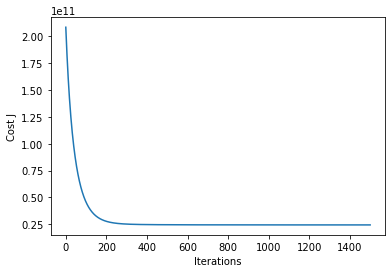

In [36]:
""" with alpha = 0.01 """
plt.plot(J_History)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8.5 : </b>
       Predict the features and plot the fitting line 
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

[[485184.09086805 397879.13413448 505448.89610984 443822.20415008
  510048.05939168]
 [485184.09086805 557340.80757291 654208.50358085 592515.92518013
  510048.05939168]
 [401600.38015637 397879.13413448 666191.52248581 399962.90514122
  510048.05939168]
 ...
 [485184.09086805 365986.79944679 564442.21994963 426706.38014662
  510048.05939168]
 [568767.80157973 589233.14226059 521969.86300247 488751.24215916
  510048.05939168]
 [485184.09086805 365986.79944679 564229.50363771 426706.38014662
  510048.05939168]]


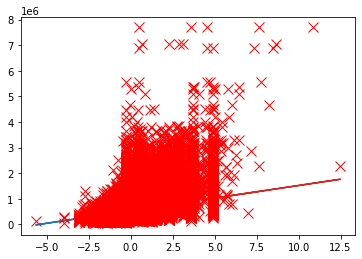

In [37]:

pred = prediction_simple_LR(new_theta, X_norm[: , 1:])
plt.plot(X_norm[: , 1:], pred)
plt.plot(X_norm[: , 1:],y[:,0],'rx',markersize=10,label='Training Data')
print(pred)

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8.6 : </b>
       Applying gradient descent with alpha = 0.1
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

In [38]:
""" Using different alpha """
length = len(X_norm[0])
theta = np.zeros((length , 1))
new_theta , J_History = gradient_descent_multi(X_norm , y , theta , 0.1 , iterations)

Error in iteration- 0  =  [[-221900.]
 [-538000.]
 [-180000.]
 ...
 [-402101.]
 [-400000.]
 [-325000.]]
Error in iteration- 1  =  [[-243176.18377101]
 [-471913.31828007]
 [-215187.46570961]
 ...
 [-427357.73939274]
 [-349200.01123932]
 [-350281.14174023]]
Error in iteration- 2  =  [[-250209.87766094]
 [-413073.12811089]
 [-230632.59607106]
 ...
 [-436337.07213999]
 [-303914.57271342]
 [-359281.41623328]]
Error in iteration- 3  =  [[-247520.01480489]
 [-360587.3865934 ]
 [-232483.34666516]
 ...
 [-434175.46040639]
 [-263516.71335535]
 [-357137.89229933]]
Error in iteration- 4  =  [[-238377.58366121]
 [-313696.071479  ]
 [-225198.45670369]
 ...
 [-424593.39028072]
 [-227460.52367248]
 [-347571.53482921]]
Error in iteration- 5  =  [[-225135.38735124]
 [-271746.9772637 ]
 [-211993.02060368]
 ...
 [-410269.28334331]
 [-195268.36949236]
 [-333261.1464565 ]]
Error in iteration- 6  =  [[-209472.04552797]
 [-234176.76319232]
 [-195168.26183239]
 ...
 [-393116.19391554]
 [-166520.58625687]
 [-31

Error in iteration- 59  =  [[ 56927.20031363]
 [106079.72713902]
 [ 98535.40148295]
 ...
 [-93732.13483452]
 [ 52863.55562308]
 [-16832.11142884]]
Error in iteration- 60  =  [[ 57262.10013755]
 [106401.13245542]
 [ 98681.54090108]
 ...
 [-93330.68538435]
 [ 52483.85387843]
 [-16430.66368427]]
Error in iteration- 61  =  [[ 57579.0371423 ]
 [106708.43627132]
 [ 98814.00766849]
 ...
 [-92950.24523581]
 [ 52104.64152851]
 [-16050.222877  ]]
Error in iteration- 62  =  [[ 57879.31704983]
 [107002.83107279]
 [ 98934.17022615]
 ...
 [-92589.3241693 ]
 [ 51726.67931843]
 [-15689.2991166 ]]
Error in iteration- 63  =  [[ 58164.13085244]
 [107285.38942091]
 [ 99043.26002624]
 ...
 [-92246.5609996 ]
 [ 51350.63362754]
 [-15346.53151097]]
Error in iteration- 64  =  [[ 58434.56575402]
 [107557.07613968]
 [ 99142.38518584]
 ...
 [-91920.71136   ]
 [ 50977.08636999]
 [-15020.67595413]]
Error in iteration- 65  =  [[ 58691.61503718]
 [107818.75927397]
 [ 99232.54278323]
 ...
 [-91610.63668103]
 [ 50606.5

Error in iteration- 120  =  [[ 64196.46082412]
 [115806.43931496]
 [100430.17324081]
 ...
 [-84914.1262074 ]
 [ 37500.07136709]
 [ -8013.71191394]]
Error in iteration- 121  =  [[ 64229.41536823]
 [115890.44326353]
 [100437.21125174]
 ...
 [-84874.13712046]
 [ 37371.99698019]
 [ -7973.7218185 ]]
Error in iteration- 122  =  [[ 64261.346467  ]
 [115972.9993152 ]
 [100444.14398628]
 ...
 [-84835.40257741]
 [ 37246.61005047]
 [ -7934.98638621]]
Error in iteration- 123  =  [[ 64292.28737901]
 [116054.1291343 ]
 [100450.9736027 ]
 ...
 [-84797.8816154 ]
 [ 37123.85441992]
 [ -7897.46464896]]
Error in iteration- 124  =  [[ 64322.27018614]
 [116133.85410003]
 [100457.70208868]
 ...
 [-84761.53471597]
 [ 37003.6750321 ]
 [ -7861.11708317]]
Error in iteration- 125  =  [[ 64351.32584331]
 [116212.19531756]
 [100464.33128147]
 ...
 [-84726.32374503]
 [ 36886.0179195 ]
 [ -7825.90554979]]
Error in iteration- 126  =  [[ 64379.48422534]
 [116289.17362775]
 [100470.86288574]
 ...
 [-84692.21189608]
 [ 

Error in iteration- 186  =  [[ 65137.98640961]
 [119071.05164232]
 [100723.32198518]
 ...
 [-83781.51417826]
 [ 32898.66653746]
 [ -6881.139874  ]]
Error in iteration- 187  =  [[ 65142.3989966 ]
 [119095.76976216]
 [100725.73625993]
 ...
 [-83776.31596047]
 [ 32866.92495412]
 [ -6875.94260934]]
Error in iteration- 188  =  [[ 65146.68350473]
 [119120.01214613]
 [100728.10743532]
 ...
 [-83771.27145955]
 [ 32835.84412   ]
 [ -6870.89905365]]
Error in iteration- 189  =  [[ 65150.84378383]
 [119143.7875049 ]
 [100730.4361845 ]
 ...
 [-83766.37598954]
 [ 32805.41020187]
 [ -6866.00452076]]
Error in iteration- 190  =  [[ 65154.88356486]
 [119167.1044051 ]
 [100732.72317357]
 ...
 [-83761.62501061]
 [ 32775.60965854]
 [ -6861.25447065]]
Error in iteration- 191  =  [[ 65158.8064637 ]
 [119189.97127113]
 [100734.96906159]
 ...
 [-83757.0141244 ]
 [ 32746.42923472]
 [ -6856.64450475]]
Error in iteration- 192  =  [[ 65162.61598473]
 [119212.39638701]
 [100737.17450047]
 ...
 [-83752.53906954]
 [ 

Error in iteration- 246  =  [[ 65265.50568011]
 [119949.51946344]
 [100811.41789482]
 ...
 [-83633.21576002]
 [ 31804.44431962]
 [ -6732.88243052]]
Error in iteration- 247  =  [[ 65266.30633877]
 [119957.0271911 ]
 [100812.1934818 ]
 ...
 [-83632.30799503]
 [ 31795.426869  ]
 [ -6731.97508582]]
Error in iteration- 248  =  [[ 65267.08540227]
 [119964.38483901]
 [100812.95400372]
 ...
 [-83631.42532874]
 [ 31786.59613866]
 [ -6731.09283277]]
Error in iteration- 249  =  [[ 65267.84348153]
 [119971.59534941]
 [100813.6997412 ]
 ...
 [-83630.56703578]
 [ 31777.94825127]
 [ -6730.23494611]]
Error in iteration- 250  =  [[ 65268.58116951]
 [119978.66160876]
 [100814.43097004]
 ...
 [-83629.73241255]
 [ 31769.47941036]
 [ -6729.4007223 ]]
Error in iteration- 251  =  [[ 65269.29904172]
 [119985.58644881]
 [100815.14796129]
 ...
 [-83628.92077647]
 [ 31761.18589862]
 [ -6728.58947888]]
Error in iteration- 252  =  [[ 65269.99765673]
 [119992.37264751]
 [100815.85098134]
 ...
 [-83628.1314654 ]
 [ 

Error in iteration- 311  =  [[ 65290.54883998]
 [120223.15917165]
 [100840.01132644]
 ...
 [-83605.27763296]
 [ 31480.56272913]
 [ -6704.9606256 ]]
Error in iteration- 312  =  [[ 65290.69512881]
 [120225.1539734 ]
 [100840.22261786]
 ...
 [-83605.11908101]
 [ 31478.24359604]
 [ -6704.80220143]]
Error in iteration- 313  =  [[ 65290.83781052]
 [120227.10821097]
 [100840.42966234]
 ...
 [-83604.96453968]
 [ 31475.97235331]
 [ -6704.64778544]]
Error in iteration- 314  =  [[ 65290.97697872]
 [120229.02270267]
 [100840.63254392]
 ...
 [-83604.81390213]
 [ 31473.74801071]
 [ -6704.49727083]]
Error in iteration- 315  =  [[ 65291.11272448]
 [120230.89825052]
 [100840.83134502]
 ...
 [-83604.66706449]
 [ 31471.56959854]
 [ -6704.35055377]]
Error in iteration- 316  =  [[ 65291.2451364 ]
 [120232.7356406 ]
 [100841.02614646]
 ...
 [-83604.52392581]
 [ 31469.43616717]
 [ -6704.20753334]]
Error in iteration- 317  =  [[ 65291.37430065]
 [120234.53564328]
 [100841.21702752]
 ...
 [-83604.38438793]
 [ 

Error in iteration- 370  =  [[ 65295.17489279]
 [120291.9874176 ]
 [100847.33478354]
 ...
 [-83600.33118114]
 [ 31401.03097497]
 [ -6700.01868492]]
Error in iteration- 371  =  [[ 65295.2102369 ]
 [120292.57823626]
 [100847.39799063]
 ...
 [-83600.2941508 ]
 [ 31400.35332401]
 [ -6699.98169436]]
Error in iteration- 372  =  [[ 65295.24476866]
 [120293.15695798]
 [100847.45991054]
 ...
 [-83600.25798896]
 [ 31399.68965037]
 [ -6699.94557151]]
Error in iteration- 373  =  [[ 65295.27850755]
 [120293.72382953]
 [100847.52056927]
 ...
 [-83600.22267428]
 [ 31399.03966558]
 [ -6699.91029504]]
Error in iteration- 374  =  [[ 65295.31147254]
 [120294.27909267]
 [100847.57999236]
 ...
 [-83600.18818598]
 [ 31398.40308711]
 [ -6699.87584419]]
Error in iteration- 375  =  [[ 65295.34368216]
 [120294.82298426]
 [100847.63820479]
 ...
 [-83600.15450382]
 [ 31397.77963827]
 [ -6699.84219873]]
Error in iteration- 376  =  [[ 65295.37515444]
 [120295.35573635]
 [100847.69523106]
 ...
 [-83600.12160808]
 [ 

Error in iteration- 434  =  [[ 65296.376437  ]
 [120313.15252509]
 [100849.60414721]
 ...
 [-83599.08497585]
 [ 31376.82991176]
 [ -6698.77392041]]
Error in iteration- 435  =  [[ 65296.38475149]
 [120313.30932196]
 [100849.62100536]
 ...
 [-83599.07647354]
 [ 31376.65130205]
 [ -6698.76542892]]
Error in iteration- 436  =  [[ 65296.39288455]
 [120313.4628974 ]
 [100849.63751799]
 ...
 [-83599.0681591 ]
 [ 31376.47637418]
 [ -6698.75712508]]
Error in iteration- 437  =  [[ 65296.40084026]
 [120313.61331748]
 [100849.65369216]
 ...
 [-83599.06002824]
 [ 31376.30505222]
 [ -6698.7490046 ]]
Error in iteration- 438  =  [[ 65296.40862258]
 [120313.76064694]
 [100849.66953478]
 ...
 [-83599.05207678]
 [ 31376.13726182]
 [ -6698.74106331]]
Error in iteration- 439  =  [[ 65296.4162354 ]
 [120313.90494916]
 [100849.68505263]
 ...
 [-83599.04430064]
 [ 31375.97293016]
 [ -6698.73329714]]
Error in iteration- 440  =  [[ 65296.42368251]
 [120314.04628626]
 [100849.70025235]
 ...
 [-83599.03669583]
 [ 

Error in iteration- 495  =  [[ 65296.65965215]
 [120318.63173749]
 [100850.19382533]
 ...
 [-83598.79698435]
 [ 31370.59693168]
 [ -6698.48630866]]
Error in iteration- 496  =  [[ 65296.66186196]
 [120318.67588673]
 [100850.19858239]
 ...
 [-83598.79475366]
 [ 31370.54679237]
 [ -6698.48408105]]
Error in iteration- 497  =  [[ 65296.66402489]
 [120318.71912756]
 [100850.20324168]
 ...
 [-83598.79257062]
 [ 31370.49768635]
 [ -6698.48190102]]
Error in iteration- 498  =  [[ 65296.66614195]
 [120318.76147865]
 [100850.2078052 ]
 ...
 [-83598.79043419]
 [ 31370.44959233]
 [ -6698.47976754]]
Error in iteration- 499  =  [[ 65296.66821415]
 [120318.80295829]
 [100850.21227492]
 ...
 [-83598.78834335]
 [ 31370.40248944]
 [ -6698.4776796 ]]
Error in iteration- 500  =  [[ 65296.67024243]
 [120318.84358441]
 [100850.21665277]
 ...
 [-83598.78629712]
 [ 31370.35635726]
 [ -6698.47563619]]
Error in iteration- 501  =  [[ 65296.67222774]
 [120318.88337454]
 [100850.22094063]
 ...
 [-83598.78429452]
 [ 

Error in iteration- 557  =  [[ 65296.73645889]
 [120320.18599143]
 [100850.36137296]
 ...
 [-83598.71968338]
 [ 31368.83294266]
 [ -6698.40911627]]
Error in iteration- 558  =  [[ 65296.73705025]
 [120320.19815006]
 [100850.3626844 ]
 ...
 [-83598.71909047]
 [ 31368.81915427]
 [ -6698.4085242 ]]
Error in iteration- 559  =  [[ 65296.73762925]
 [120320.21005834]
 [100850.36396884]
 ...
 [-83598.71850999]
 [ 31368.80565001]
 [ -6698.40794456]]
Error in iteration- 560  =  [[ 65296.73819616]
 [120320.22172141]
 [100850.36522686]
 ...
 [-83598.71794168]
 [ 31368.79242401]
 [ -6698.40737706]]
Error in iteration- 561  =  [[ 65296.73875122]
 [120320.23314433]
 [100850.36645898]
 ...
 [-83598.71738528]
 [ 31368.77947055]
 [ -6698.40682147]]
Error in iteration- 562  =  [[ 65296.73929469]
 [120320.24433204]
 [100850.36766575]
 ...
 [-83598.71684054]
 [ 31368.76678399]
 [ -6698.40627751]]
Error in iteration- 563  =  [[ 65296.73982681]
 [120320.25528938]
 [100850.36884768]
 ...
 [-83598.71630721]
 [ 

Error in iteration- 620  =  [[ 65296.75730502]
 [120320.61725124]
 [100850.40789906]
 ...
 [-83598.69881357]
 [ 31368.34402555]
 [ -6698.38827669]]
Error in iteration- 621  =  [[ 65296.75746223]
 [120320.6205286 ]
 [100850.40825273]
 ...
 [-83598.69865647]
 [ 31368.34031142]
 [ -6698.38811982]]
Error in iteration- 622  =  [[ 65296.75761619]
 [120320.62373845]
 [100850.40859911]
 ...
 [-83598.69850264]
 [ 31368.33667382]
 [ -6698.38796621]]
Error in iteration- 623  =  [[ 65296.75776695]
 [120320.62688218]
 [100850.40893837]
 ...
 [-83598.698352  ]
 [ 31368.33311117]
 [ -6698.38781579]]
Error in iteration- 624  =  [[ 65296.75791458]
 [120320.62996116]
 [100850.40927063]
 ...
 [-83598.69820449]
 [ 31368.32962193]
 [ -6698.3876685 ]]
Error in iteration- 625  =  [[ 65296.75805915]
 [120320.63297672]
 [100850.40959606]
 ...
 [-83598.69806004]
 [ 31368.32620458]
 [ -6698.38752426]]
Error in iteration- 626  =  [[ 65296.75820073]
 [120320.63593017]
 [100850.40991478]
 ...
 [-83598.69791859]
 [ 

Error in iteration- 681  =  [[ 65296.76277763]
 [120320.7316586 ]
 [100850.42024632]
 ...
 [-83598.69334871]
 [ 31368.21438905]
 [ -6698.38281987]]
Error in iteration- 682  =  [[ 65296.76282152]
 [120320.73257928]
 [100850.4203457 ]
 ...
 [-83598.69330492]
 [ 31368.21334599]
 [ -6698.38277615]]
Error in iteration- 683  =  [[ 65296.7628645 ]
 [120320.73348099]
 [100850.42044302]
 ...
 [-83598.69326204]
 [ 31368.21232443]
 [ -6698.38273333]]
Error in iteration- 684  =  [[ 65296.76290659]
 [120320.73436413]
 [100850.42053835]
 ...
 [-83598.69322005]
 [ 31368.21132391]
 [ -6698.38269139]]
Error in iteration- 685  =  [[ 65296.76294782]
 [120320.73522907]
 [100850.42063171]
 ...
 [-83598.69317892]
 [ 31368.21034401]
 [ -6698.38265033]]
Error in iteration- 686  =  [[ 65296.76298819]
 [120320.7360762 ]
 [100850.42072314]
 ...
 [-83598.69313864]
 [ 31368.20938429]
 [ -6698.38261011]]
Error in iteration- 687  =  [[ 65296.76302772]
 [120320.73690587]
 [100850.4208127 ]
 ...
 [-83598.6930992 ]
 [ 

Error in iteration- 742  =  [[ 65296.76430753]
 [120320.76379605]
 [100850.42371529]
 ...
 [-83598.69182279]
 [ 31368.17798221]
 [ -6698.38129621]]
Error in iteration- 743  =  [[ 65296.76431982]
 [120320.76405465]
 [100850.42374321]
 ...
 [-83598.69181054]
 [ 31368.17768928]
 [ -6698.38128397]]
Error in iteration- 744  =  [[ 65296.76433186]
 [120320.76430793]
 [100850.42377055]
 ...
 [-83598.69179854]
 [ 31368.17740238]
 [ -6698.38127199]]
Error in iteration- 745  =  [[ 65296.76434365]
 [120320.76455598]
 [100850.42379733]
 ...
 [-83598.69178678]
 [ 31368.17712139]
 [ -6698.38126025]]
Error in iteration- 746  =  [[ 65296.76435519]
 [120320.76479893]
 [100850.42382355]
 ...
 [-83598.69177527]
 [ 31368.17684619]
 [ -6698.38124876]]
Error in iteration- 747  =  [[ 65296.7643665 ]
 [120320.76503687]
 [100850.42384924]
 ...
 [-83598.691764  ]
 [ 31368.17657667]
 [ -6698.38123751]]
Error in iteration- 748  =  [[ 65296.76437757]
 [120320.76526991]
 [100850.42387439]
 ...
 [-83598.69175296]
 [ 

 [ -6698.38088774]]
Error in iteration- 799  =  [[ 65296.76472173]
 [120320.7725165 ]
 [100850.42465667]
 ...
 [-83598.6914099 ]
 [ 31368.16810435]
 [ -6698.38088393]]
Error in iteration- 800  =  [[ 65296.76472548]
 [120320.77259544]
 [100850.42466519]
 ...
 [-83598.69140617]
 [ 31368.16801494]
 [ -6698.3808802 ]]
Error in iteration- 801  =  [[ 65296.76472915]
 [120320.77267275]
 [100850.42467353]
 ...
 [-83598.69140251]
 [ 31368.16792737]
 [ -6698.38087655]]
Error in iteration- 802  =  [[ 65296.76473274]
 [120320.77274847]
 [100850.42468171]
 ...
 [-83598.69139893]
 [ 31368.1678416 ]
 [ -6698.38087297]]
Error in iteration- 803  =  [[ 65296.76473626]
 [120320.77282263]
 [100850.42468971]
 ...
 [-83598.69139542]
 [ 31368.1677576 ]
 [ -6698.38086947]]
Error in iteration- 804  =  [[ 65296.76473971]
 [120320.77289526]
 [100850.42469756]
 ...
 [-83598.69139198]
 [ 31368.16767533]
 [ -6698.38086604]]
Error in iteration- 805  =  [[ 65296.76474308]
 [120320.7729664 ]
 [100850.42470523]
 ...
 [

Error in iteration- 861  =  [[ 65296.76485352]
 [120320.77529403]
 [100850.42495651]
 ...
 [-83598.69127856]
 [ 31368.16495834]
 [ -6698.38075279]]
Error in iteration- 862  =  [[ 65296.76485455]
 [120320.77531574]
 [100850.42495886]
 ...
 [-83598.69127754]
 [ 31368.16493374]
 [ -6698.38075176]]
Error in iteration- 863  =  [[ 65296.76485555]
 [120320.77533701]
 [100850.42496115]
 ...
 [-83598.69127653]
 [ 31368.16490966]
 [ -6698.38075076]]
Error in iteration- 864  =  [[ 65296.76485654]
 [120320.77535784]
 [100850.4249634 ]
 ...
 [-83598.69127555]
 [ 31368.16488606]
 [ -6698.38074978]]
Error in iteration- 865  =  [[ 65296.76485751]
 [120320.77537824]
 [100850.4249656 ]
 ...
 [-83598.69127458]
 [ 31368.16486296]
 [ -6698.38074881]]
Error in iteration- 866  =  [[ 65296.76485846]
 [120320.77539822]
 [100850.42496776]
 ...
 [-83598.69127364]
 [ 31368.16484033]
 [ -6698.38074787]]
Error in iteration- 867  =  [[ 65296.76485938]
 [120320.77541778]
 [100850.42496987]
 ...
 [-83598.69127272]
 [ 

Error in iteration- 920  =  [[ 65296.76488886]
 [120320.77603936]
 [100850.42503697]
 ...
 [-83598.69124335]
 [ 31368.16411415]
 [ -6698.38071762]]
Error in iteration- 921  =  [[ 65296.76488916]
 [120320.77604571]
 [100850.42503766]
 ...
 [-83598.69124304]
 [ 31368.16410695]
 [ -6698.38071732]]
Error in iteration- 922  =  [[ 65296.76488946]
 [120320.77605194]
 [100850.42503833]
 ...
 [-83598.69124275]
 [ 31368.1640999 ]
 [ -6698.38071703]]
Error in iteration- 923  =  [[ 65296.76488975]
 [120320.77605804]
 [100850.42503899]
 ...
 [-83598.69124246]
 [ 31368.16409299]
 [ -6698.38071674]]
Error in iteration- 924  =  [[ 65296.76489003]
 [120320.77606401]
 [100850.42503964]
 ...
 [-83598.69124218]
 [ 31368.16408623]
 [ -6698.38071646]]
Error in iteration- 925  =  [[ 65296.76489031]
 [120320.77606986]
 [100850.42504027]
 ...
 [-83598.6912419 ]
 [ 31368.1640796 ]
 [ -6698.38071618]]
Error in iteration- 926  =  [[ 65296.76489058]
 [120320.77607559]
 [100850.42504089]
 ...
 [-83598.69124163]
 [ 

Error in iteration- 980  =  [[ 65296.76489929]
 [120320.77625944]
 [100850.42506073]
 ...
 [-83598.69123295]
 [ 31368.16386488]
 [ -6698.38070724]]
Error in iteration- 981  =  [[ 65296.76489938]
 [120320.77626127]
 [100850.42506093]
 ...
 [-83598.69123286]
 [ 31368.16386281]
 [ -6698.38070716]]
Error in iteration- 982  =  [[ 65296.76489947]
 [120320.77626305]
 [100850.42506112]
 ...
 [-83598.69123278]
 [ 31368.16386079]
 [ -6698.38070707]]
Error in iteration- 983  =  [[ 65296.76489955]
 [120320.7762648 ]
 [100850.42506131]
 ...
 [-83598.6912327 ]
 [ 31368.16385881]
 [ -6698.38070699]]
Error in iteration- 984  =  [[ 65296.76489963]
 [120320.77626651]
 [100850.4250615 ]
 ...
 [-83598.69123261]
 [ 31368.16385687]
 [ -6698.38070691]]
Error in iteration- 985  =  [[ 65296.76489971]
 [120320.77626819]
 [100850.42506168]
 ...
 [-83598.69123254]
 [ 31368.16385497]
 [ -6698.38070683]]
Error in iteration- 986  =  [[ 65296.76489979]
 [120320.77626983]
 [100850.42506186]
 ...
 [-83598.69123246]
 [ 

Error in iteration- 1038  =  [[ 65296.76490223]
 [120320.77632148]
 [100850.42506743]
 ...
 [-83598.69123002]
 [ 31368.16379462]
 [ -6698.38070432]]
Error in iteration- 1039  =  [[ 65296.76490226]
 [120320.77632202]
 [100850.42506749]
 ...
 [-83598.69122999]
 [ 31368.163794  ]
 [ -6698.38070429]]
Error in iteration- 1040  =  [[ 65296.76490229]
 [120320.77632255]
 [100850.42506755]
 ...
 [-83598.69122997]
 [ 31368.1637934 ]
 [ -6698.38070426]]
Error in iteration- 1041  =  [[ 65296.76490231]
 [120320.77632308]
 [100850.4250676 ]
 ...
 [-83598.69122994]
 [ 31368.16379281]
 [ -6698.38070424]]
Error in iteration- 1042  =  [[ 65296.76490234]
 [120320.77632359]
 [100850.42506766]
 ...
 [-83598.69122992]
 [ 31368.16379223]
 [ -6698.38070422]]
Error in iteration- 1043  =  [[ 65296.76490236]
 [120320.77632409]
 [100850.42506771]
 ...
 [-83598.6912299 ]
 [ 31368.16379166]
 [ -6698.38070419]]
Error in iteration- 1044  =  [[ 65296.76490238]
 [120320.77632458]
 [100850.42506777]
 ...
 [-83598.691229

Error in iteration- 1098  =  [[ 65296.76490313]
 [120320.77634034]
 [100850.42506947]
 ...
 [-83598.69122913]
 [ 31368.16377325]
 [ -6698.38070343]]
Error in iteration- 1099  =  [[ 65296.76490314]
 [120320.7763405 ]
 [100850.42506949]
 ...
 [-83598.69122912]
 [ 31368.16377307]
 [ -6698.38070342]]
Error in iteration- 1100  =  [[ 65296.76490314]
 [120320.77634065]
 [100850.4250695 ]
 ...
 [-83598.69122911]
 [ 31368.1637729 ]
 [ -6698.38070341]]
Error in iteration- 1101  =  [[ 65296.76490315]
 [120320.7763408 ]
 [100850.42506952]
 ...
 [-83598.69122911]
 [ 31368.16377273]
 [ -6698.3807034 ]]
Error in iteration- 1102  =  [[ 65296.76490316]
 [120320.77634095]
 [100850.42506953]
 ...
 [-83598.6912291 ]
 [ 31368.16377256]
 [ -6698.3807034 ]]
Error in iteration- 1103  =  [[ 65296.76490316]
 [120320.77634109]
 [100850.42506955]
 ...
 [-83598.69122909]
 [ 31368.1637724 ]
 [ -6698.38070339]]
Error in iteration- 1104  =  [[ 65296.76490317]
 [120320.77634123]
 [100850.42506956]
 ...
 [-83598.691229

Error in iteration- 1156  =  [[ 65296.76490338]
 [120320.77634566]
 [100850.42507004]
 ...
 [-83598.69122888]
 [ 31368.16376723]
 [ -6698.38070318]]
Error in iteration- 1157  =  [[ 65296.76490338]
 [120320.77634571]
 [100850.42507005]
 ...
 [-83598.69122887]
 [ 31368.16376717]
 [ -6698.38070317]]
Error in iteration- 1158  =  [[ 65296.76490339]
 [120320.77634575]
 [100850.42507005]
 ...
 [-83598.69122887]
 [ 31368.16376712]
 [ -6698.38070317]]
Error in iteration- 1159  =  [[ 65296.76490339]
 [120320.7763458 ]
 [100850.42507006]
 ...
 [-83598.69122887]
 [ 31368.16376707]
 [ -6698.38070317]]
Error in iteration- 1160  =  [[ 65296.76490339]
 [120320.77634584]
 [100850.42507006]
 ...
 [-83598.69122887]
 [ 31368.16376702]
 [ -6698.38070317]]
Error in iteration- 1161  =  [[ 65296.76490339]
 [120320.77634589]
 [100850.42507007]
 ...
 [-83598.69122887]
 [ 31368.16376697]
 [ -6698.38070316]]
Error in iteration- 1162  =  [[ 65296.76490339]
 [120320.77634593]
 [100850.42507007]
 ...
 [-83598.691228

Error in iteration- 1216  =  [[ 65296.76490346]
 [120320.77634728]
 [100850.42507022]
 ...
 [-83598.6912288 ]
 [ 31368.1637654 ]
 [ -6698.3807031 ]]
Error in iteration- 1217  =  [[ 65296.76490346]
 [120320.77634729]
 [100850.42507022]
 ...
 [-83598.6912288 ]
 [ 31368.16376538]
 [ -6698.3807031 ]]
Error in iteration- 1218  =  [[ 65296.76490346]
 [120320.7763473 ]
 [100850.42507022]
 ...
 [-83598.6912288 ]
 [ 31368.16376537]
 [ -6698.3807031 ]]
Error in iteration- 1219  =  [[ 65296.76490346]
 [120320.77634732]
 [100850.42507022]
 ...
 [-83598.6912288 ]
 [ 31368.16376535]
 [ -6698.3807031 ]]
Error in iteration- 1220  =  [[ 65296.76490346]
 [120320.77634733]
 [100850.42507022]
 ...
 [-83598.6912288 ]
 [ 31368.16376534]
 [ -6698.3807031 ]]
Error in iteration- 1221  =  [[ 65296.76490346]
 [120320.77634734]
 [100850.42507022]
 ...
 [-83598.6912288 ]
 [ 31368.16376532]
 [ -6698.3807031 ]]
Error in iteration- 1222  =  [[ 65296.76490346]
 [120320.77634735]
 [100850.42507023]
 ...
 [-83598.691228

Error in iteration- 1274  =  [[ 65296.76490348]
 [120320.77634773]
 [100850.42507027]
 ...
 [-83598.69122878]
 [ 31368.16376488]
 [ -6698.38070308]]
Error in iteration- 1275  =  [[ 65296.76490348]
 [120320.77634774]
 [100850.42507027]
 ...
 [-83598.69122878]
 [ 31368.16376487]
 [ -6698.38070308]]
Error in iteration- 1276  =  [[ 65296.76490348]
 [120320.77634774]
 [100850.42507027]
 ...
 [-83598.69122878]
 [ 31368.16376487]
 [ -6698.38070308]]
Error in iteration- 1277  =  [[ 65296.76490348]
 [120320.77634775]
 [100850.42507027]
 ...
 [-83598.69122878]
 [ 31368.16376487]
 [ -6698.38070308]]
Error in iteration- 1278  =  [[ 65296.76490348]
 [120320.77634775]
 [100850.42507027]
 ...
 [-83598.69122878]
 [ 31368.16376486]
 [ -6698.38070308]]
Error in iteration- 1279  =  [[ 65296.76490348]
 [120320.77634775]
 [100850.42507027]
 ...
 [-83598.69122878]
 [ 31368.16376486]
 [ -6698.38070308]]
Error in iteration- 1280  =  [[ 65296.76490348]
 [120320.77634776]
 [100850.42507027]
 ...
 [-83598.691228

Error in iteration- 1329  =  [[ 65296.76490349]
 [120320.77634787]
 [100850.42507028]
 ...
 [-83598.69122877]
 [ 31368.16376473]
 [ -6698.38070307]]
Error in iteration- 1330  =  [[ 65296.76490349]
 [120320.77634787]
 [100850.42507028]
 ...
 [-83598.69122877]
 [ 31368.16376473]
 [ -6698.38070307]]
Error in iteration- 1331  =  [[ 65296.76490349]
 [120320.77634787]
 [100850.42507028]
 ...
 [-83598.69122877]
 [ 31368.16376473]
 [ -6698.38070307]]
Error in iteration- 1332  =  [[ 65296.76490349]
 [120320.77634787]
 [100850.42507028]
 ...
 [-83598.69122877]
 [ 31368.16376472]
 [ -6698.38070307]]
Error in iteration- 1333  =  [[ 65296.76490349]
 [120320.77634787]
 [100850.42507028]
 ...
 [-83598.69122877]
 [ 31368.16376472]
 [ -6698.38070307]]
Error in iteration- 1334  =  [[ 65296.76490349]
 [120320.77634787]
 [100850.42507028]
 ...
 [-83598.69122877]
 [ 31368.16376472]
 [ -6698.38070307]]
Error in iteration- 1335  =  [[ 65296.76490349]
 [120320.77634787]
 [100850.42507028]
 ...
 [-83598.691228

Error in iteration- 1389  =  [[ 65296.76490349]
 [120320.77634791]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376468]
 [ -6698.38070307]]
Error in iteration- 1390  =  [[ 65296.76490349]
 [120320.77634791]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376468]
 [ -6698.38070307]]
Error in iteration- 1391  =  [[ 65296.76490349]
 [120320.77634791]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376468]
 [ -6698.38070307]]
Error in iteration- 1392  =  [[ 65296.76490349]
 [120320.77634791]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376468]
 [ -6698.38070307]]
Error in iteration- 1393  =  [[ 65296.76490349]
 [120320.77634791]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376468]
 [ -6698.38070307]]
Error in iteration- 1394  =  [[ 65296.76490349]
 [120320.77634791]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376468]
 [ -6698.38070307]]
Error in iteration- 1395  =  [[ 65296.76490349]
 [120320.77634791]
 [100850.42507029]
 ...
 [-83598.691228

Error in iteration- 1447  =  [[ 65296.76490349]
 [120320.77634792]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376466]
 [ -6698.38070307]]
Error in iteration- 1448  =  [[ 65296.76490349]
 [120320.77634792]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376466]
 [ -6698.38070307]]
Error in iteration- 1449  =  [[ 65296.76490349]
 [120320.77634792]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376466]
 [ -6698.38070307]]
Error in iteration- 1450  =  [[ 65296.76490349]
 [120320.77634792]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376466]
 [ -6698.38070307]]
Error in iteration- 1451  =  [[ 65296.76490349]
 [120320.77634792]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376466]
 [ -6698.38070307]]
Error in iteration- 1452  =  [[ 65296.76490349]
 [120320.77634792]
 [100850.42507029]
 ...
 [-83598.69122877]
 [ 31368.16376466]
 [ -6698.38070307]]
Error in iteration- 1453  =  [[ 65296.76490349]
 [120320.77634792]
 [100850.42507029]
 ...
 [-83598.691228

In [39]:
new_theta

array([[540088.1417665 ],
       [ 96674.01611697],
       [-16051.8085571 ],
       [ 92692.11611557],
       [169695.13368792],
       [ 75703.40491621]])

In [40]:
J_History

array([[1.68225459e+11],
       [1.35980428e+11],
       [1.12178093e+11],
       ...,
       [2.44793568e+10],
       [2.44793568e+10],
       [2.44793568e+10]])

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8.7 : </b>
       Predict the features and plot the fitting line 
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

[[486063.24555382 400156.02541034 506003.6149235  445363.55517228
  510529.14643181]
 [486063.24555382 557064.74625569 652381.60794478 591676.71658262
  510529.14643181]
 [403817.69495548 400156.02541034 664172.7808812  402206.43561959
  510529.14643181]
 ...
 [486063.24555382 368774.28124127 564052.46630277 428521.75242001
  510529.14643181]
 [568308.79615217 588446.49042476 522260.08411986 489573.28739699
  510529.14643181]
 [486063.24555382 368774.28124127 563843.15554058 428521.75242001
  510529.14643181]]


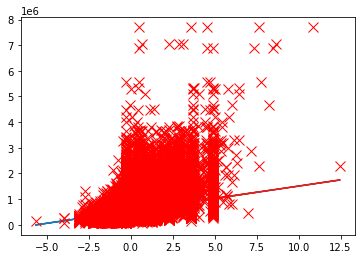

In [41]:
pred = prediction_simple_LR(new_theta, X_norm[: , 1:])
plt.plot(X_norm[: , 1:], pred)
plt.plot(X_norm[: , 1:],y[:,0],'rx',markersize=10,label='Training Data')
print(pred)

<div style="color:black; border-radius: 5px; background-color:#E7E9EB;padding: 10px;">
    <p style="  padding: 5px;"><b>Finding 8.7 : </b>
       Plotting the history of the cost function with alpha = 0.1
 </p>
</div>

<div style="color:black; border-radius: 5px; margin: 5px 0;font-family:'Source Sans Pro', sans-serif;">
 <h4 style="border-left: 4px solid #96D4D4; background: #D9EEE1; padding: 5px; font-family:'Source Sans Pro', sans-serif;">Code</h4>
</div>

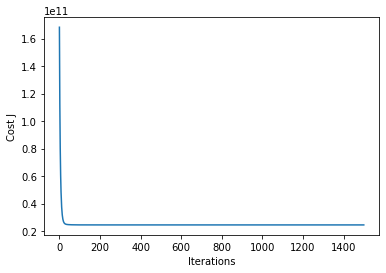

In [42]:
""" with alpha = 0.1 """
plt.plot(J_History)
plt.ylabel('Cost J')
plt.xlabel('Iterations');